<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

# this line hides warnings
warnings.filterwarnings('ignore')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# Loading the file with csv module
sat = csv.reader(open('sat_scores.csv', 'r'))

# Separating the header from the data
sat_list = list(sat)
sat_header = sat_list[0]
sat_data = sat_list[1:]

# Creating a dictionary based on the headers and data in each column
sat_dict = {}

for idx,header in enumerate(sat_header):
    sat_dict[header] = [data[idx] for data in sat_data]

pprint(sat_dict, compact=True)

{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501',
          '499', '510', '499', '489', '501', '488', '474', '526', '499', '527',
          '499', '515', '510', '517', '525', '515', '542', '439', '539', '512',
          '542', '553', '542', '589', '550', '545', '572', '589', '580', '554',
          '568', '561', '577', '562', '596', '550', '570', '603', '582', '599',
          '551', '514'],
 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67',
          '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52',
          '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13',
          '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6',
          '5', '5', '4', '4', '4', '45'],
 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE',
           'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI',
           'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', '

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
# Making a pandas DataFrame object with the SAT dictionary created in qn1.1
sat_datadict = pd.DataFrame(sat_dict)
print(sat_datadict.dtypes)

State     object
Rate      object
Verbal    object
Math      object
dtype: object


In [4]:
# Making a pandas DataFrame object of the SAT dictionary with the .read_csv() function
sat_data = pd.read_csv('sat_scores.csv')
print(sat_data.dtypes)

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
# First 10 rows of the DataFrame
sat_data.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


The data decribes the participation rate, in percentage, by state and the average verbal and math scores by state

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [6]:
# Creating a 'data dictionary' of the data in a pandas DataFrame
col_names = ['Variable Name', 'Variable Type', 'Description']

data_dict = pd.DataFrame(columns = col_names)
data_dict.loc[0] = ['State', 'Object', 'Two alpha of the State']
data_dict.loc[1] = ['Rate', 'Integer', 'Participation Rate (%)']
data_dict.loc[2] = ['Verbal', 'Integer', 'Average SAT Verbal score']
data_dict.loc[3] = ['Math', 'Integer', 'Average SAT Math score']
data_dict.loc[4] = ['Shape of Dataset', 'Null', str(sat_data.shape)]
data_dict

,Variable Name,Variable Type,Description
0,State,Object,Two alpha of the State
1,Rate,Integer,Participation Rate (%)
2,Verbal,Integer,Average SAT Verbal score
3,Math,Integer,Average SAT Math score
4,Shape of Dataset,Null,"(52, 4)"


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

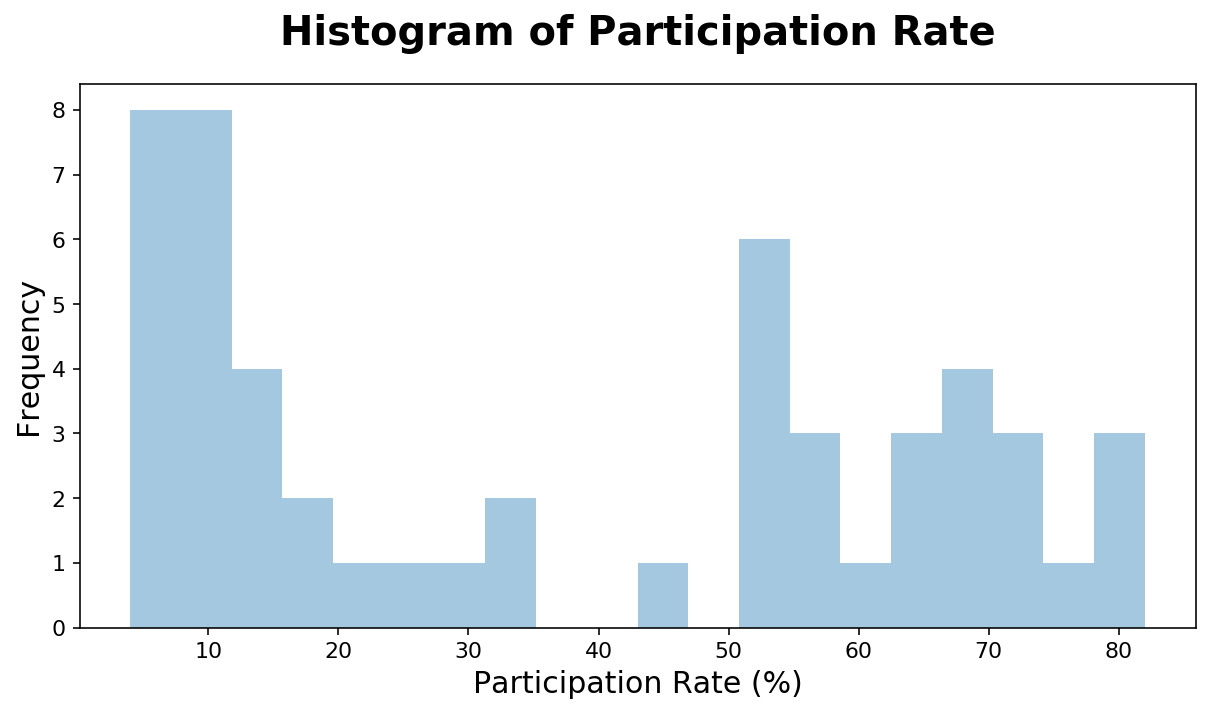

In [7]:
# Setting the plot figure size
plt.figure(figsize=(10,5))

# Using seaborn's distplot to plot distribution of 'Rate'
sns.distplot(sat_data['Rate'], bins=20, kde=False)

# Adding title, x & y labels and formatting
plt.title("Histogram of Participation Rate", fontsize=20, fontweight='bold').set_position([.5, 1.05])
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Participation Rate (%)', fontsize=15)
plt.tick_params(labelsize = 11)
plt.show()

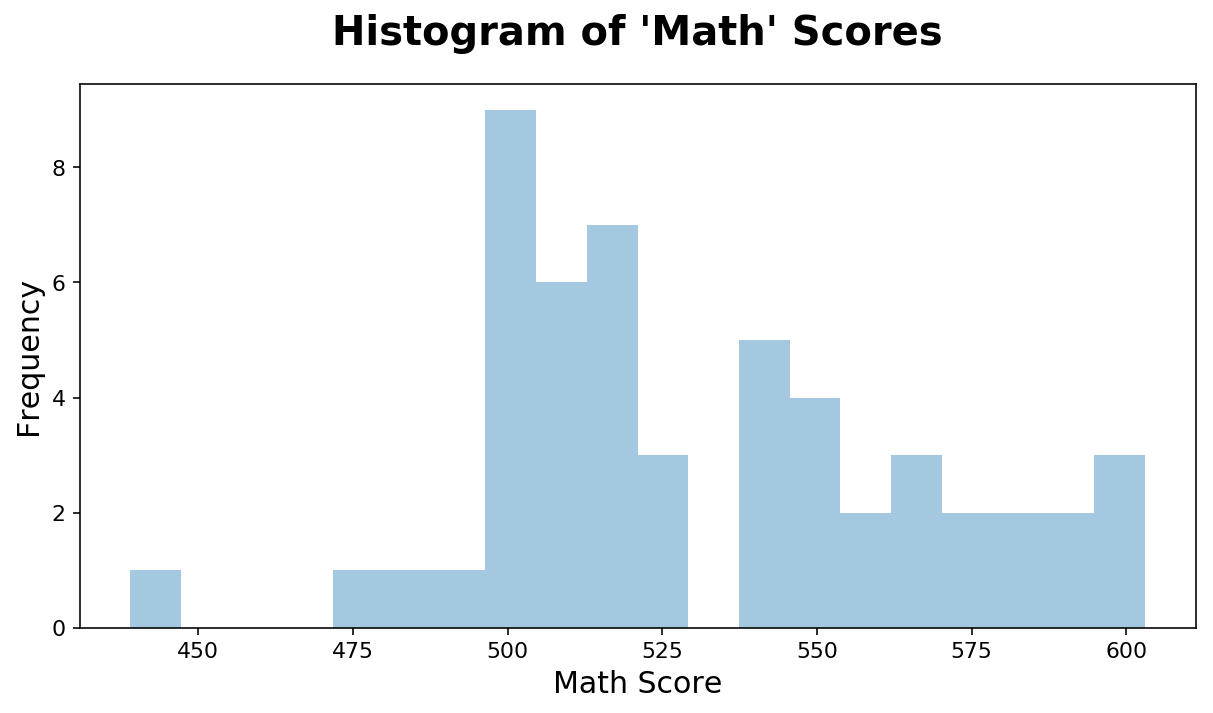

In [8]:
# Setting the plot figure size
plt.figure(figsize=(10,5))

# Using seaborn's distplot to plot distribution of 'Math'
sns.distplot(sat_data['Math'], bins=20, kde=False)

# Adding title, x & y labels and formatting
plt.title("Histogram of 'Math' Scores", fontsize=20, fontweight='bold').set_position([.5, 1.05])
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Math Score', fontsize=15)
plt.tick_params(labelsize = 11)
plt.show()

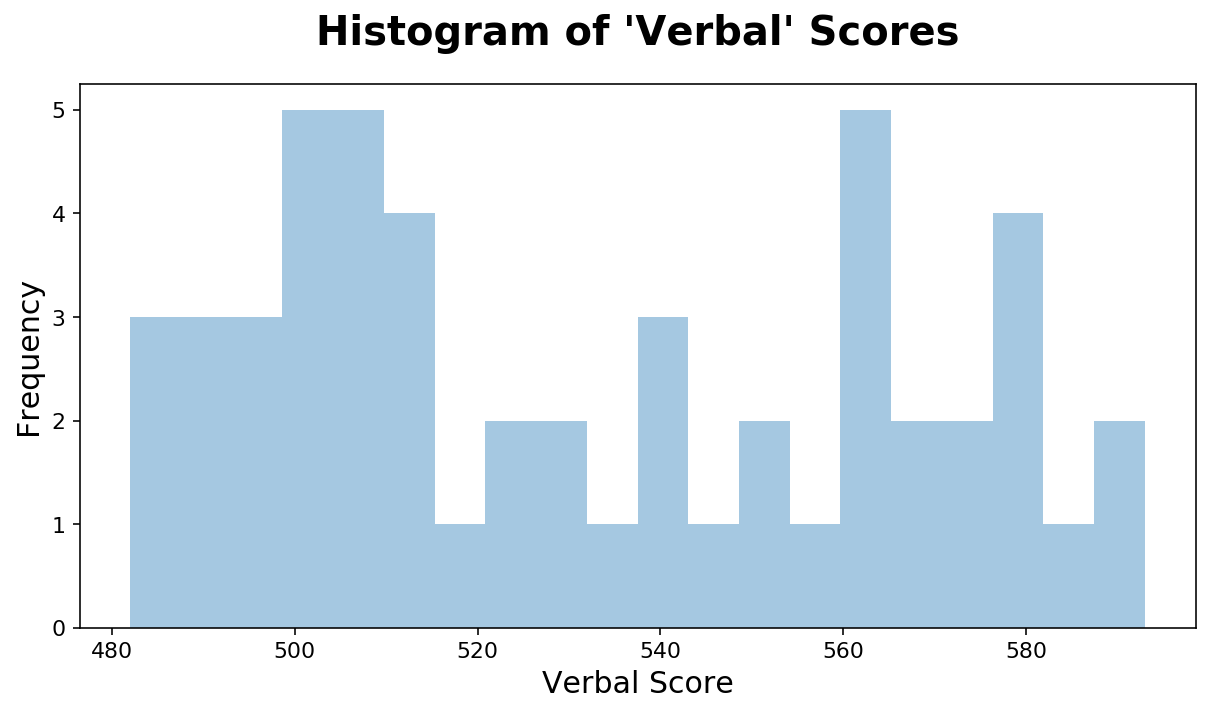

In [9]:
# Setting the plot figure size
plt.figure(figsize=(10,5))

# Using seaborn's distplot to plot distribution of 'Verbal'
sns.distplot(sat_data['Verbal'], bins=20, kde=False)

# Adding title, x & y labels and formatting
plt.title("Histogram of 'Verbal' Scores", fontsize=20, fontweight='bold').set_position([.5, 1.05])
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Verbal Score', fontsize=15)
plt.tick_params(labelsize = 11)
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

<Figure size 720x720 with 0 Axes>

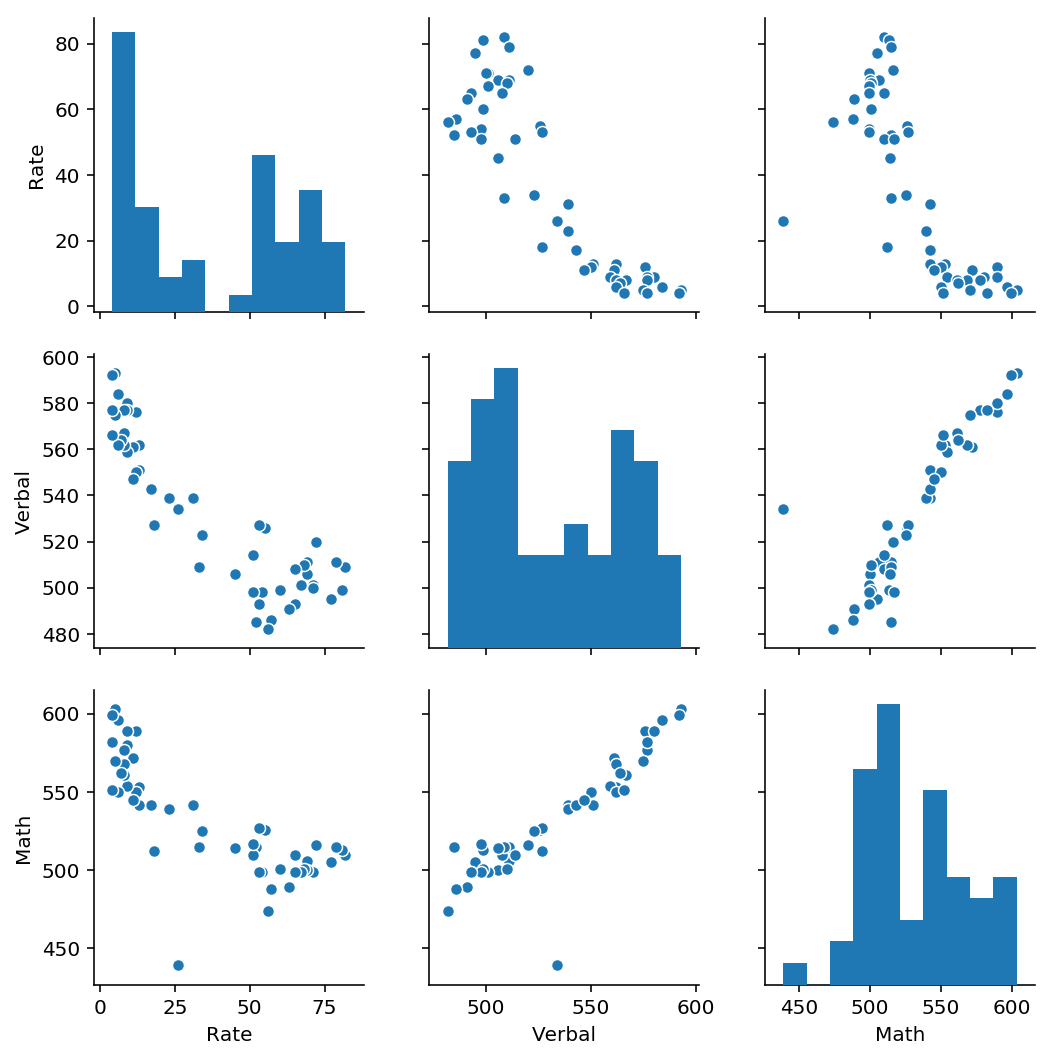

In [10]:
# Using seaborn's pairplot on 'Rate', 'Math' and 'Verbal'
plt.figure(figsize=(10,10))
sns.pairplot(sat_data)
plt.show()

<div class="alert alert-block alert-info">
<b> Observations </b>
</div>

<div class="alert alert-block alert-info">
    
### What the pairplot tells about the data

The pairplot provides the distribution of each variable and the relationship between them.

'Rate' and 'Verbal' seem to have a bimodal distribution, while 'Math' seems to more normally distributed.

From the pairplot, it can be seen that 'Rate' is negatively correlated to both 'Verbal' and 'Math', while 'Verbal' and 'Math' is positively correlated.

</div>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

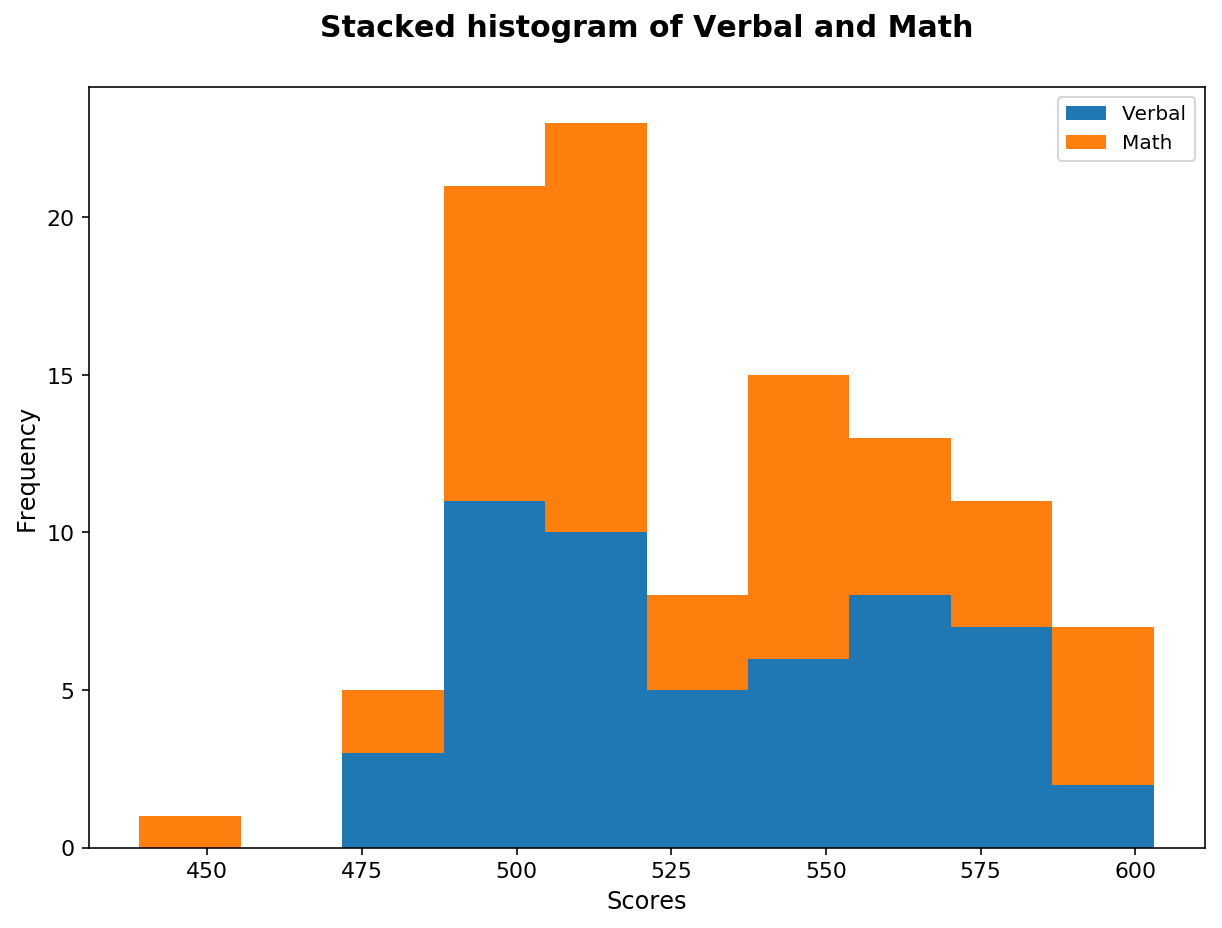

In [11]:
# Plotting a stacked histogram of 'Verbal' and 'Math' using pandas
sat_data[['Verbal', 'Math']].plot(kind='hist', stacked=True, figsize=(10,7))
plt.title("Stacked histogram of Verbal and Math", fontsize=15, fontweight='bold').set_position([.5, 1.05])
plt.xlabel('Scores', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tick_params(labelsize = 11)
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

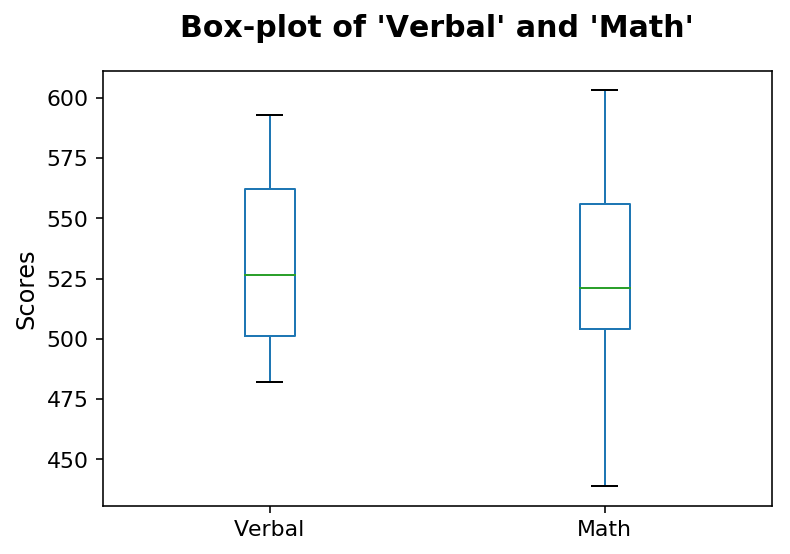

In [12]:
# Plotting 'Verbal' and 'Math' on the same chart using boxplots
sat_data[['Verbal', 'Math']].plot(kind='box')
plt.title("Box-plot of 'Verbal' and 'Math'", fontsize=15, fontweight='bold').set_position([.5, 1.05])
plt.ylabel('Scores', fontsize=12)
plt.tick_params(labelsize = 11)
plt.show()

### Benefits of using a boxplot as compared to a scatterplot or histogram

A boxplot allows for easy visual identification of the 1st, 2nd and 3rd quartiles as well as any outliers.

### What's wrong with plotting a box-plot of 'Rate' on the same chart as 'Math' and 'Verbal'

The values of 'Rate' is much smaller as compared to 'Math' and 'Verbal', thus they are on different scales.
If they were all to be plotted in the same box-plot, it would no longer be easy to visually identify the spread and quartiles as the box-plots would all be compressed due to the larger y-axis scale.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [13]:
# Standardize the data by converting 'Verbal', 'Math' and 'Rate' to z-scores
def standardize(column):
    '''
    Function to standardize data in column
    Returns z-score
    '''
    return (sat_data[column]-np.mean(sat_data[column])) / np.std(sat_data[column])

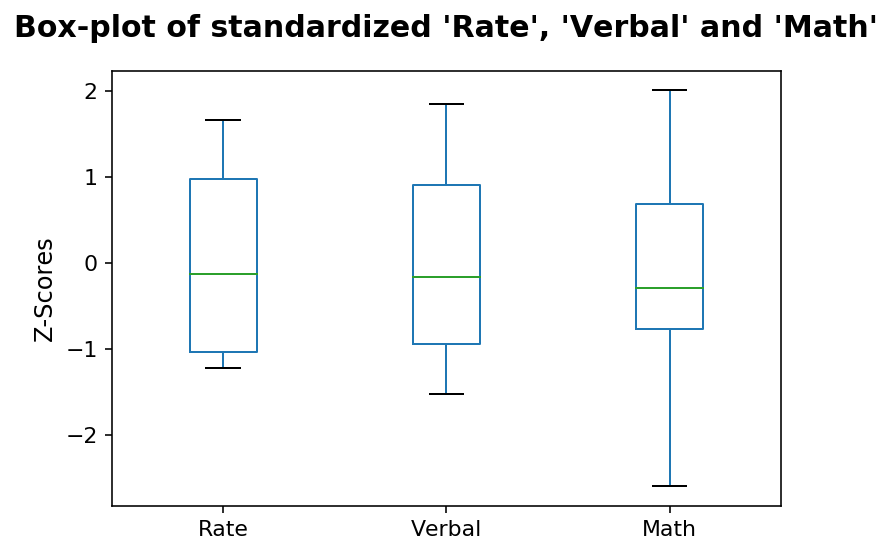

In [14]:
# Creating a DataFrame of the standardized values of 'Rate', 'Verbal' and 'Math'
sat_norm = pd.concat([standardize('Rate'), standardize('Verbal'), standardize('Math')], axis=1)

# Plotting the 3 variables on the same boxplot chart
sat_norm.plot(kind='box')

# Adding title, y label and formatting
plt.title("Box-plot of standardized 'Rate', 'Verbal' and 'Math'", fontsize=15, fontweight='bold').set_position([.5, 1.05])
plt.ylabel('Z-Scores', fontsize=12)
plt.tick_params(labelsize = 11)
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [15]:
# Checking the number of unique states and number of states in the DataFrame
print("Number of unique States:", len(sat_data['State'].unique()))
print("Number of States in DataFrame:", len(sat_data['State']))

Number of unique States: 52
Number of States in DataFrame: 52


In [16]:
# Number of 'States' in DataFrame is equal to the number of unique 'States'
print("The number of states that are above the mean is:",len(sat_data[sat_data['Verbal'] > np.mean(sat_data['Verbal'])]['State'].unique()))
print("The list of states are:",sat_data[sat_data['Verbal'] > np.mean(sat_data['Verbal'])]['State'].unique())

The number of states that are above the mean is: 24
The list of states are: ['CO' 'OH' 'MT' 'ID' 'TN' 'NM' 'IL' 'KY' 'WY' 'MI' 'MN' 'KS' 'AL' 'NE'
 'OK' 'MO' 'LA' 'WI' 'AR' 'UT' 'IA' 'SD' 'ND' 'MS']


There are 24 states that are above the mean, this means about half of the states are above the mean and the other half are below the mean. This means that the distribution of the 'Verbal' scores are quite normally distributed.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [17]:
print("The number of states that are above the median is:",len(sat_data[sat_data['Verbal'] > np.median(sat_data['Verbal'])]['State'].unique()))
print("The list of states are:",sat_data[sat_data['Verbal'] > np.median(sat_data['Verbal'])]['State'].unique())

The number of states that are above the median is: 26
The list of states are: ['WA' 'CO' 'OH' 'MT' 'WV' 'ID' 'TN' 'NM' 'IL' 'KY' 'WY' 'MI' 'MN' 'KS'
 'AL' 'NE' 'OK' 'MO' 'LA' 'WI' 'AR' 'UT' 'IA' 'SD' 'ND' 'MS']


### Comparing states with 'Verbal' scores greater than the median.

There are 26 states that are above the median, which is exactly half.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [18]:
# Creating a new column showing the difference between Verbal and Math scores
sat_data['verbal_math_diff'] = (sat_data['Verbal']-sat_data['Math'])

sat_data.head()

,State,Rate,Verbal,Math,verbal_math_diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [19]:
# Creating a new DataFrame with the greatest positive gap between 'Verbal' and 'Math' scores
# with the greatest number at the top (ie, descending numbers of the difference)
df1 = sat_data[sat_data['verbal_math_diff'] > 0].sort_values('verbal_math_diff',ascending=False)

# Showing only the top 3 states
df1.head(3)

,State,Rate,Verbal,Math,verbal_math_diff
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15


In [20]:
# Creating a new DataFrame with the greatest negative gap between 'Verbal' and 'Math' scores
# with the smallest number at the top (ie, ascending numbers of the difference)
df2 = sat_data[sat_data['verbal_math_diff'] < 0].sort_values('verbal_math_diff',ascending=True)

# Showing only the top 3 states
df2.head(3)

,State,Rate,Verbal,Math,verbal_math_diff
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [21]:
# Creating correlation matrix of the 'Rate', 'Verbal' and 'Math' variables
sat_data[['Rate', 'Verbal', 'Math']].corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


The correlation matrix tells us that all the variables are quite strongly correlated.
'Rate' is negatively correlated to 'Verbal' and 'Math' while 'Verbal' and 'Math' are positively correlated.
This means that 'Verbal' and 'Math' scores tends to move in tandem (ie, increase or decrease together).
However, ('Rate' and 'Verbal') and ('Rate' and 'Math') is inversely related (ie, when one increases, the other decrease). 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [22]:
# Using the .describe() function on the 'Rate', 'Verbal' and 'Math' DataFrame
sat_data[['Rate', 'Verbal', 'Math']].describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


### What each row returned by .describe() indicates

'count': The number of non-Null items in that column. 'Rate', 'Verbal' and 'Math' all have 52 items in their respective columns.

'mean': The average of all the values in that column. The average score of 'Rate' is 37.153846, the average score of 'Verbal' is 532.019231 and the average score of 'Math' is 531.5.

'std': The standard deviation of the column. 

'min': The smallest value in the column. The smallest 'Rate' score is 4, the smallest 'Verbal' score is 482 and the smallest 'Math' score is 439.

'25%': The value at the 1st quartile of the column (ie, 25 percentile).

'50%': The value at the 2nd quartile of the column (ie, 50 percentile).

'75%': The value at the 3rd quartile of the column (ie, 75 percentile).

'max': The largest value in the column. The largest 'Rate' score is 82, the largest 'Verbal' score is 593 and the largest 'Math' score is 603.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [23]:
# Creating and assigning covariance matrix of the 'Rate', 'Verbal' and 'Math' variables
sat_cov = sat_data[['Rate', 'Verbal', 'Math']].cov()

# Displaying the covariance matrix
sat_cov

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


###  1. Describe how the covariance matrix is different from the correlation matrix.

Correlation measures how strongly two variables are related, while covariance measures extent to which two variables change in tandem. Correlation is a unit free measure which is a scaled version of covariance and lie between -1 and +1. Covariance is affected by change in scale of the values in the variables while correlation is not.

### 2. What is the process to convert the covariance into the correlation?

The process to convert covariance into correlation is to take the covariance of the two variables divided by the multiplied standard deviation of the two variables.

### $$ correlation(X, Y) =\frac{covariance(X, Y)}{std(X) std(Y)}$$

### 3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

The correlation matrix is preferred over the covariance matrix for examining the data due to the difference in scale for the 'Rate' variable. Since correlation is unaffected by changes in scale, correlation is preferred to examine the relationship among all 3 variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

| Header | Definition |
| --- | --- |
| alcohol-use | Percentage of those in an age group who used alcohol in the past 12 months |
| alcohol-frequency | Median number of times a user in an age group used alcohol in the past 12 months |
| marijuana-use | Percentage of those in an age group who used marijuana in the past 12 months |
| marijuana-frequency | Median number of times a user in an age group used marijuana in the past 12 months |
| cocaine-use | Percentage of those in an age group who used cocaine in the past 12 months |
| cocaine-frequency | Median number of times a user in an age group used cocaine in the past 12 months |
| crack-use | Percentage of those in an age group who used crack in the past 12 months |
| crack-frequency | Median number of times a user in an age group used crack in the past 12 months |
| heroin-use | Percentage of those in an age group who used heroin in the past 12 months |
| heroin-frequency | Median number of times a user in an age group used heroin in the past 12 months |
| hallucinogen-use | Percentage of those in an age group who used hallucinogens in the past 12 months |
| hallucinogen-frequency | Median number of times a user in an age group used hallucinogens in the past 12 months |
| inhalant-use | Percentage of those in an age group who used inhalants in the past 12 months |
| inhalant-frequency | Median number of times a user in an age group used inhalants in the past 12 months |
| pain-reliever-use | Percentage of those in an age group who used pain relievers in the past 12 months |
| pain-reliever-frequency | Median number of times a user in an age group used pain relievers in the past 12 months |
| oxycontin-use | Percentage of those in an age group who used oxycontin in the past 12 months |
| oxycontin-frequency | Median number of times a user in an age group used oxycontin in the past 12 months |
| tranquilizer-use | Percentage of those in an age group who used tranquilizer in the past 12 months |
| tranquilizer-frequency | Median number of times a user in an age group used tranquilizer in the past 12 months |
| stimulant-use | Percentage of those in an age group who used stimulants in the past 12 months |
| stimulant-frequency | Median number of times a user in an age group used stimulants in the past 12 months |
| meth-use | Percentage of those in an age group who used meth in the past 12 months |
| meth-frequency | Median number of times a user in an age group used meth in the past 12 months |
| sedative-use | Percentage of those in an age group who used sedatives in the past 12 months |
| sedative-frequency | Median number of times a user in an age group used sedatives in the past 12 months |

In [24]:
# Loading in the drug-use-by-age data
drug = pd.read_csv('./drug-use-by-age.csv')

In [25]:
# Use .info() to check number of entries per column and the dtype of each column
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [26]:
# Checking why certain columns are not the expected dtype
# Age should be integer, frequencies should be floats

print("Age:", drug['age'].unique())
print("Cocaine-frequency:", drug['cocaine-frequency'].unique())
print("Crack-frequency:", drug['crack-frequency'].unique())
print("Heroin-frequency:", drug['heroin-frequency'].unique())
print("Inhalant-frequency:", drug['inhalant-frequency'].unique())
print("Oxycontin-frequency:", drug['oxycontin-frequency'].unique())
print("Meth-frequency:", drug['meth-frequency'].unique())

Age: ['12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22-23' '24-25' '26-29'
 '30-34' '35-49' '50-64' '65+']
Cocaine-frequency: ['5.0' '1.0' '5.5' '4.0' '7.0' '8.0' '6.0' '15.0' '36.0' '-']
Crack-frequency: ['-' '3.0' '9.5' '1.0' '21.0' '10.0' '2.0' '5.0' '17.0' '6.0' '15.0'
 '48.0' '62.0']
Heroin-frequency: ['35.5' '-' '2.0' '1.0' '66.5' '64.0' '46.0' '180.0' '45.0' '30.0' '57.5'
 '88.0' '50.0' '66.0' '280.0' '41.0' '120.0']
Inhalant-frequency: ['19.0' '12.0' '5.0' '5.5' '3.0' '4.0' '2.0' '3.5' '10.0' '13.5' '-']
Oxycontin-frequency: ['24.5' '41.0' '4.5' '3.0' '4.0' '6.0' '7.0' '7.5' '12.0' '13.5' '17.5'
 '20.0' '46.0' '5.0' '-']
Meth-frequency: ['-' '5.0' '24.0' '10.5' '36.0' '48.0' '12.0' '105.0' '2.0' '46.0' '21.0'
 '30.0' '54.0' '104.0']


In [27]:
# Age variable can be maintained as object due to age banding above 21 years of age

In [28]:
# Cleaning the '-' values in frequency and replacing with 0 as they fall in the frequency column with usage 0

prob_col = ['cocaine-frequency'
            ,'crack-frequency'
            ,'heroin-frequency'
            ,'inhalant-frequency'
            ,'oxycontin-frequency'
            ,'meth-frequency']

for col in prob_col:
    drug.loc[drug[col] == '-', col] = 0
    drug[col] = drug[col].astype(float)

In [29]:
# Renaming typos in Column headers
drug.rename(columns={'pain-releiver-use':'pain-reliever-use',
                     'pain-releiver-frequency':'pain-reliever-frequency'}, inplace=True)

In [30]:
# Displaying the cleaned dataset
pd.set_option('display.max_columns', None)
drug

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-reliever-use,pain-reliever-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,0.0,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [31]:
# Applying .describe() to view the summary statistics of the data
drug.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-reliever-use,pain-reliever-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,0.352941,68.970588,3.394118,8.411765,1.388235,5.794118,6.270588,14.705882,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,0.333762,70.153285,2.792506,15.000245,0.927283,4.937291,3.166379,6.935098,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,2.000000,0.000000,0.000000,0.600000,7.000000,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,0.100000,35.500000,0.600000,3.000000,0.600000,3.000000,3.900000,12.000000,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,50.000000,3.200000,3.000000,1.400000,4.000000,6.200000,12.000000,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,66.500000,5.200000,4.000000,2.000000,5.500000,9.000000,15.000000,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,280.000000,8.600000,52.000000,3.000000,19.000000,10.000000,36.000000,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [32]:
# Creating a DataFrame containing only the drug use data
drug_use = drug[[d for d in drug.columns if "use" in d]]

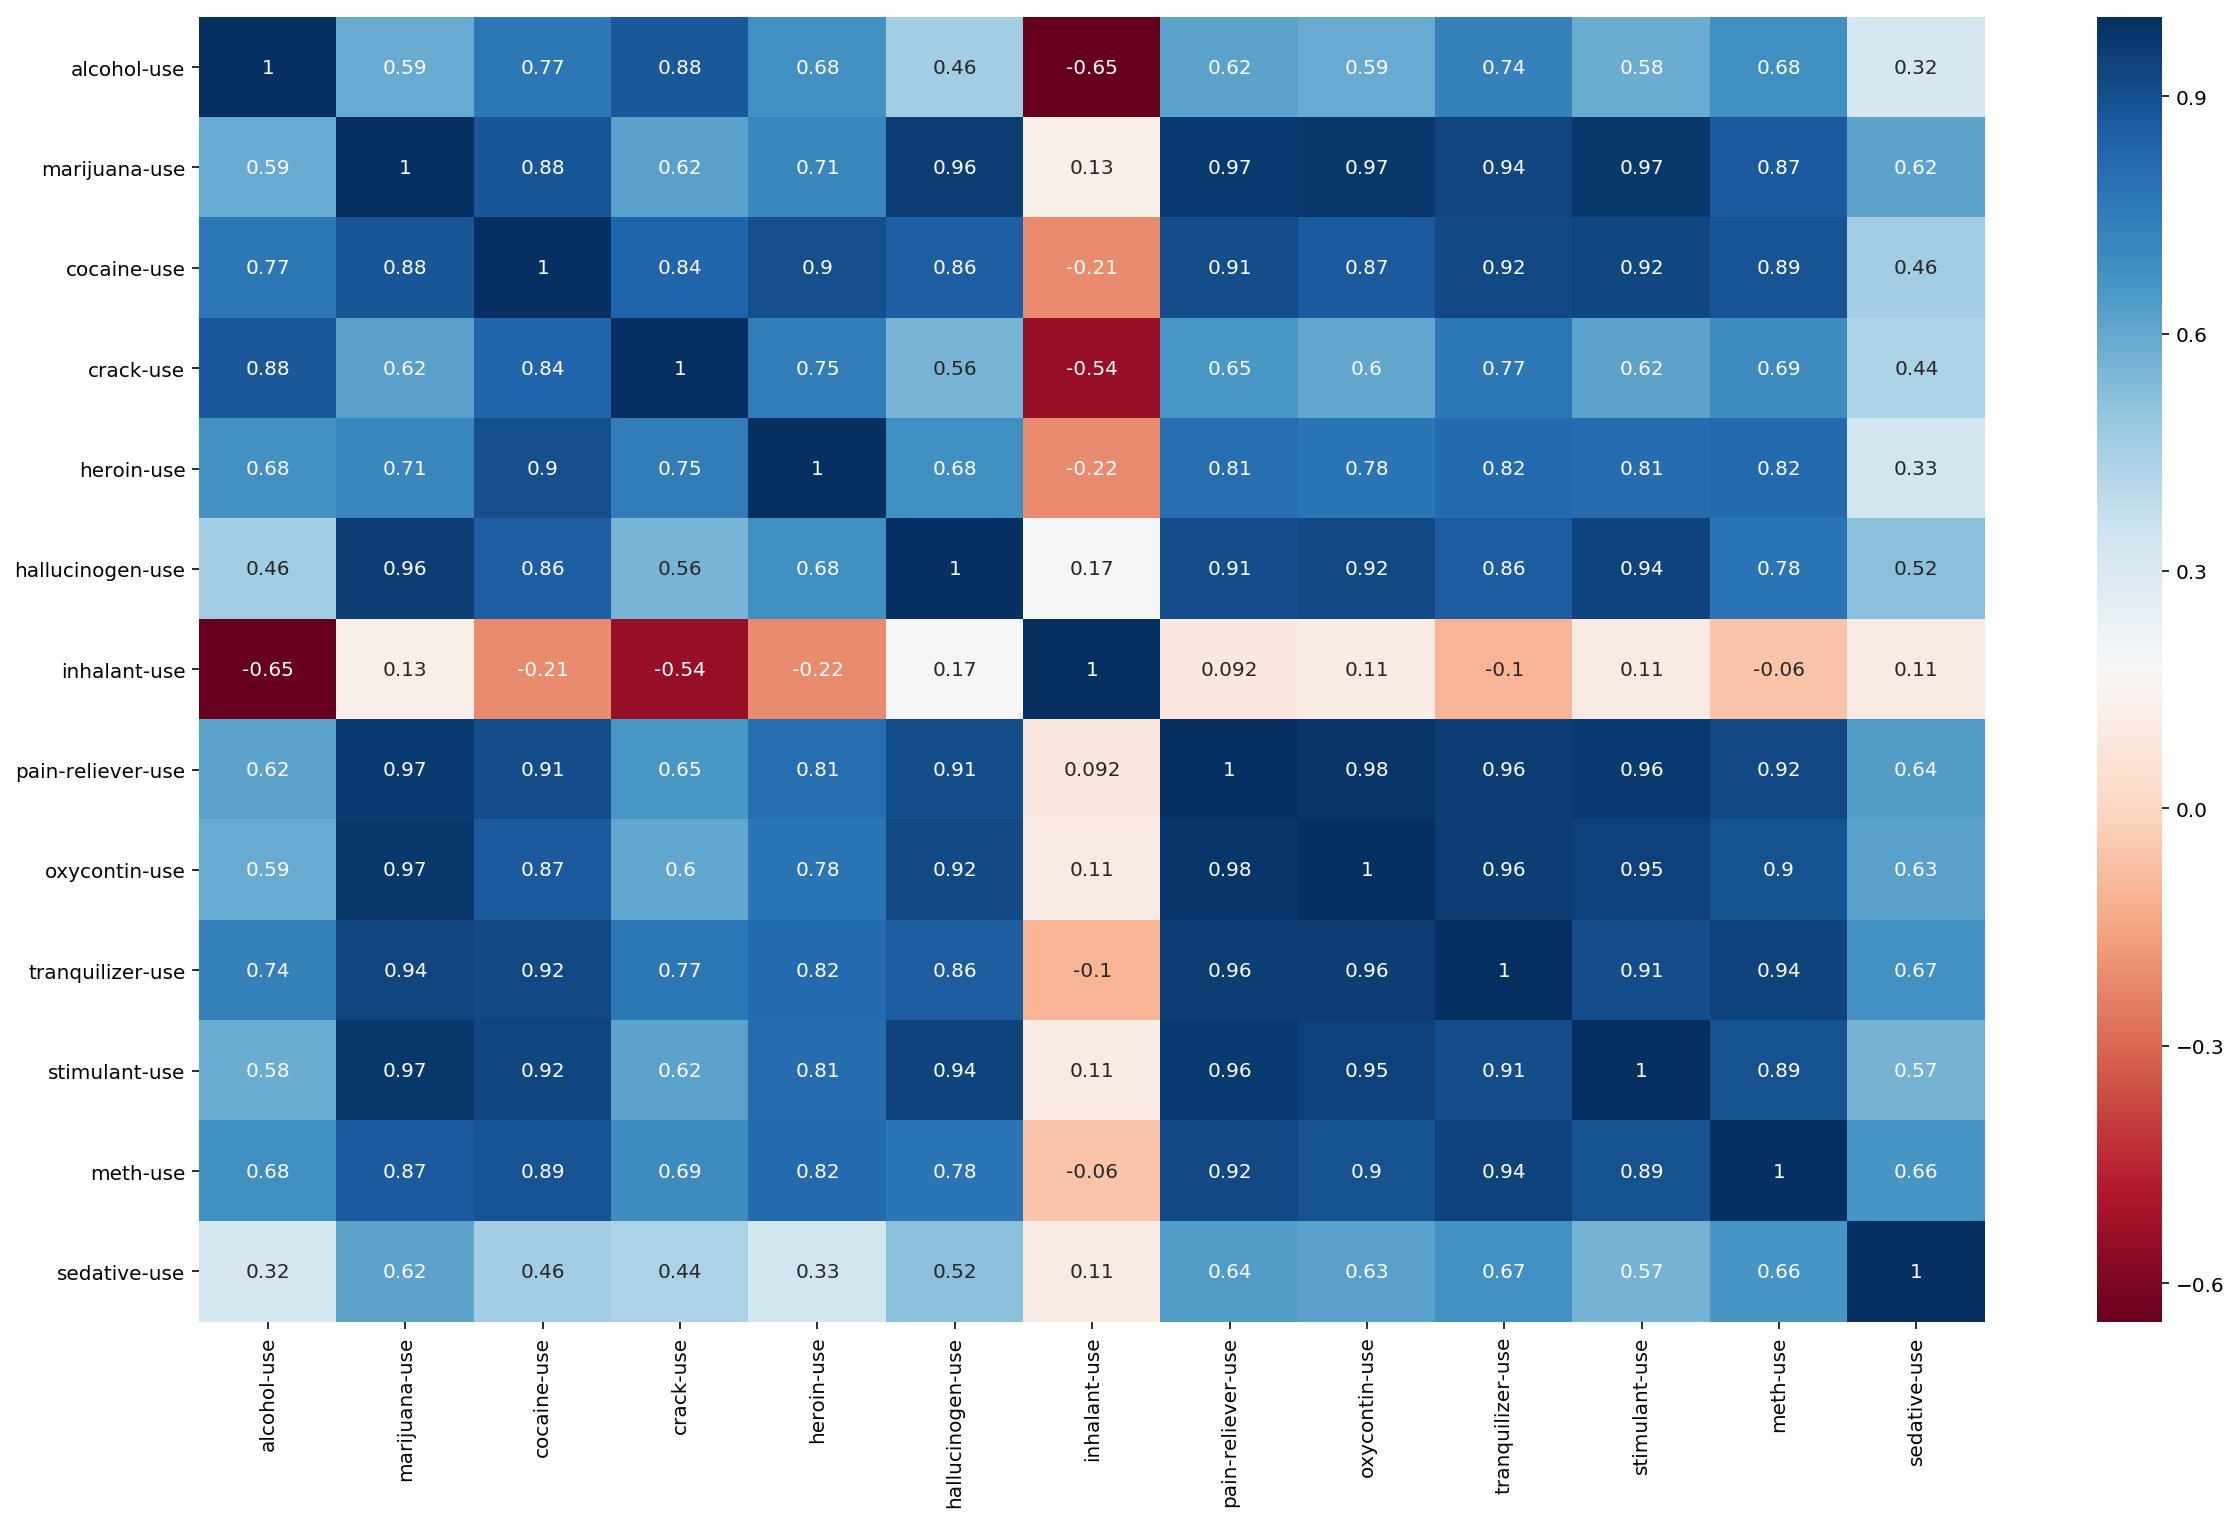

In [33]:
# Visualizing the correlation of the various drug usage via seaborn's heatmap
plt.figure(figsize=(20,12))
sns.heatmap(drug_use.corr(), annot=True, cmap='RdBu')
plt.show()

All the drugs, except for inhalant, seem to be positively correlated to each other.

Further visualization of the drug usage for each age is required to get a sense of what sort of drugs are used across the ages.

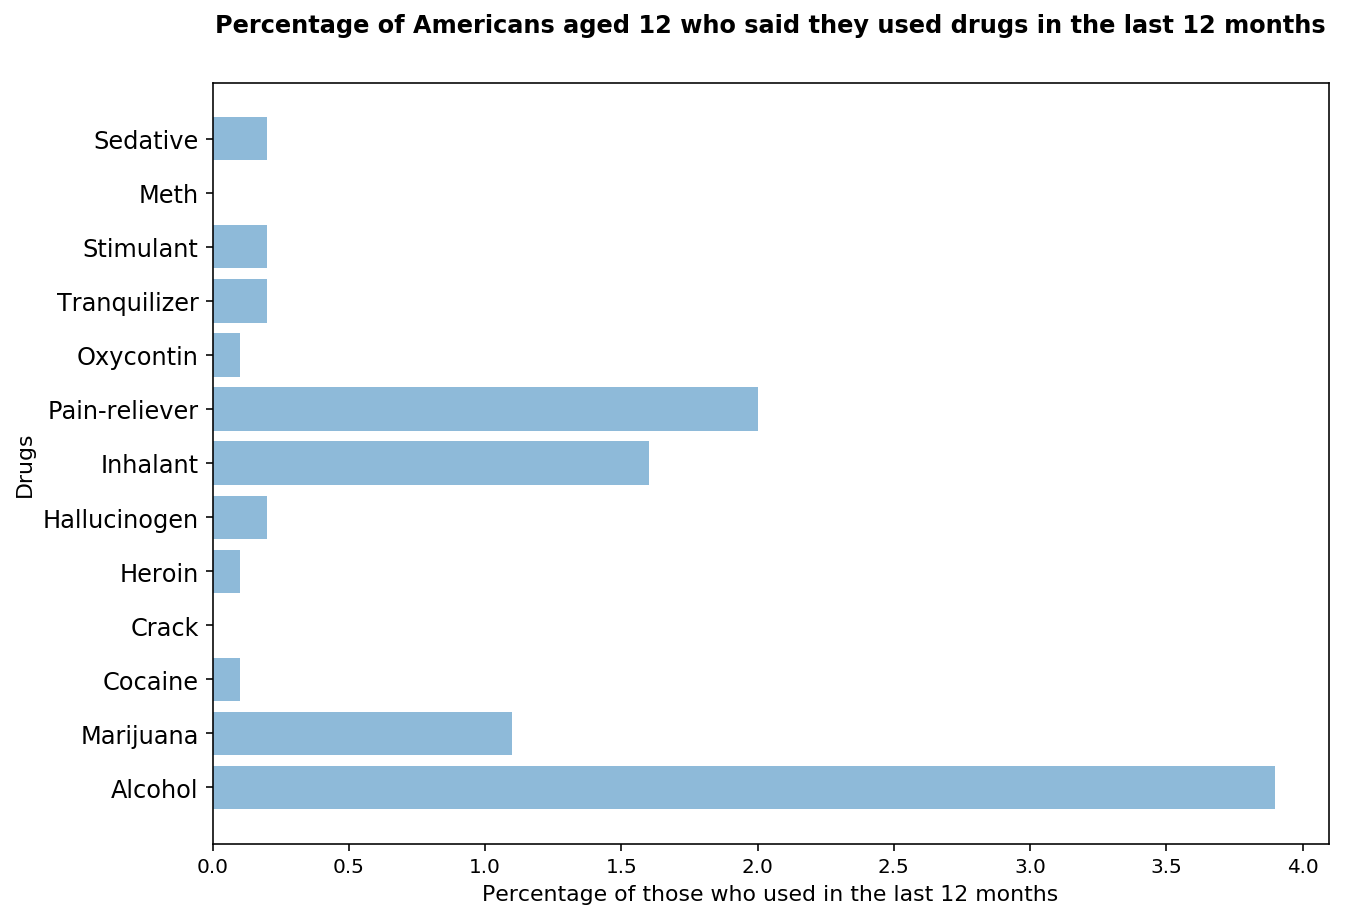

In [34]:
# Setting the plot figure size
plt.figure(figsize=(10,7))

# Plotting the drug usage for this age group
plt.barh(y=[d.replace('-use','').capitalize() for d in drug_use.columns], width=list(drug_use.iloc[0,:]), alpha=0.5)

# Adding title, x & y labels and formatting
plt.yticks(fontsize=12)
plt.ylabel('Drugs', fontsize=11)
plt.xlabel('Percentage of those who used in the last 12 months', fontsize=11)
plt.title('Percentage of Americans aged 12 who said they used drugs in the last 12 months', fontsize=12, fontweight='bold').set_position([.5, 1.05])
plt.show()

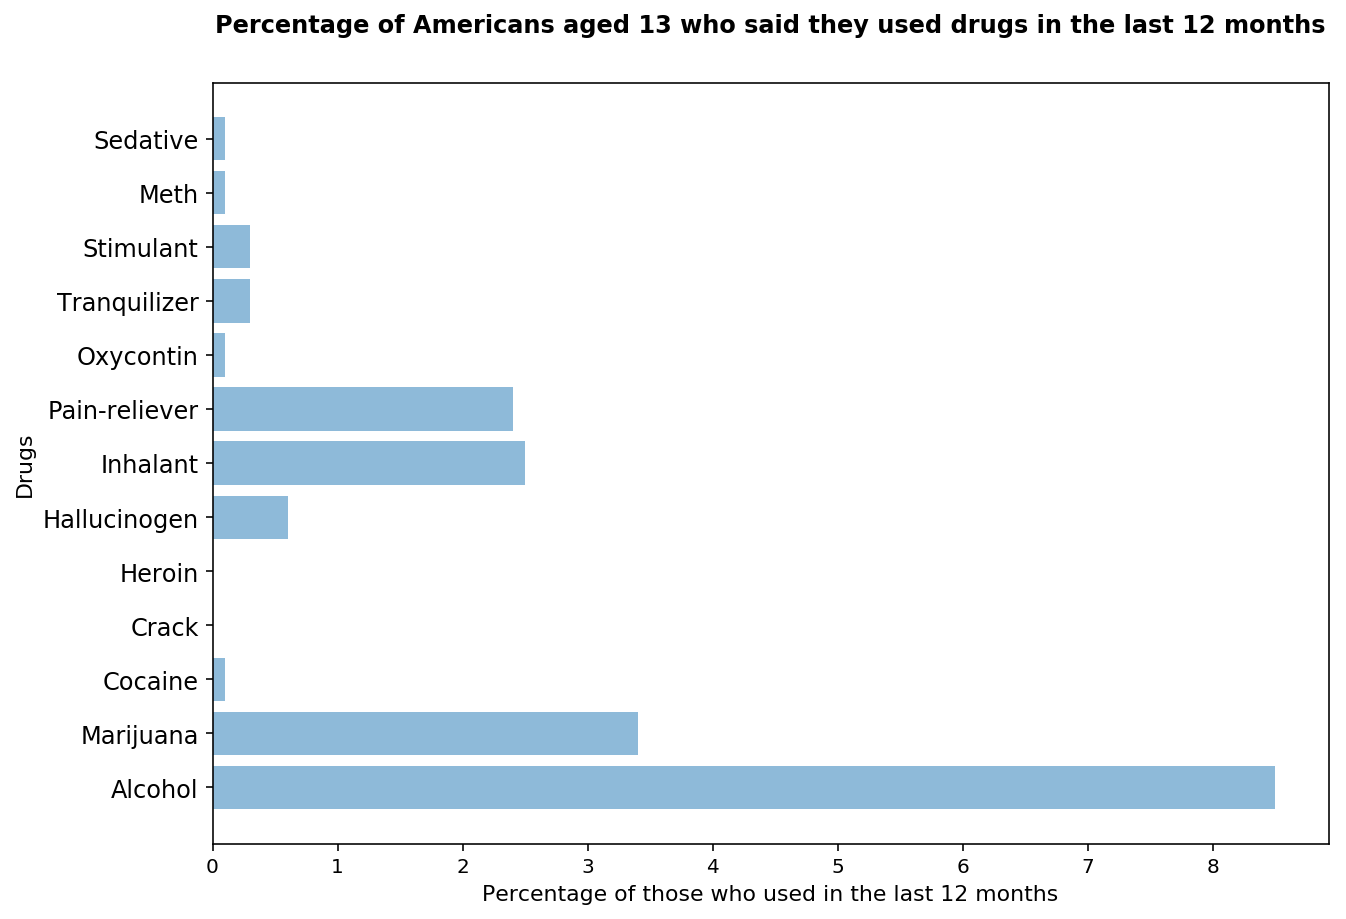

In [35]:
# Setting the plot figure size
plt.figure(figsize=(10,7))

# Plotting the drug usage for this age group
plt.barh(y=[d.replace('-use','').capitalize() for d in drug_use.columns], width=list(drug_use.iloc[1,:]), alpha=0.5)

# Adding title, x & y labels and formatting
plt.yticks(fontsize=12)
plt.ylabel('Drugs', fontsize=11)
plt.xlabel('Percentage of those who used in the last 12 months', fontsize=11)
plt.title('Percentage of Americans aged 13 who said they used drugs in the last 12 months', fontsize=12, fontweight='bold').set_position([.5, 1.05])
plt.show()

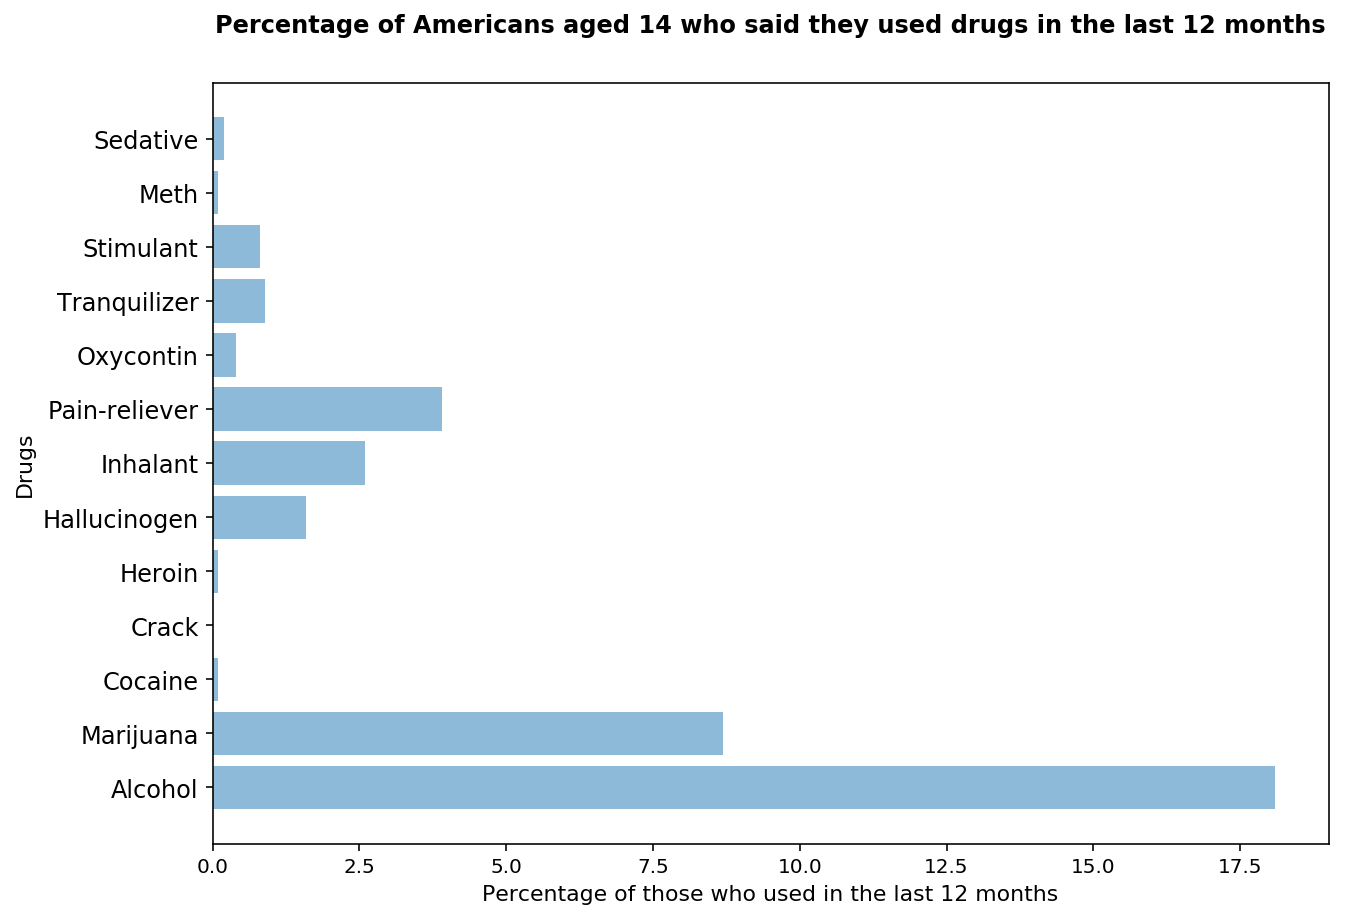

In [36]:
# Setting the plot figure size
plt.figure(figsize=(10,7))

# Plotting the drug usage for this age group
plt.barh(y=[d.replace('-use','').capitalize() for d in drug_use.columns], width=list(drug_use.iloc[2,:]), alpha=0.5)

# Adding title, x & y labels and formatting
plt.yticks(fontsize=12)
plt.ylabel('Drugs', fontsize=11)
plt.xlabel('Percentage of those who used in the last 12 months', fontsize=11)
plt.title('Percentage of Americans aged 14 who said they used drugs in the last 12 months', fontsize=12, fontweight='bold').set_position([.5, 1.05])
plt.show()

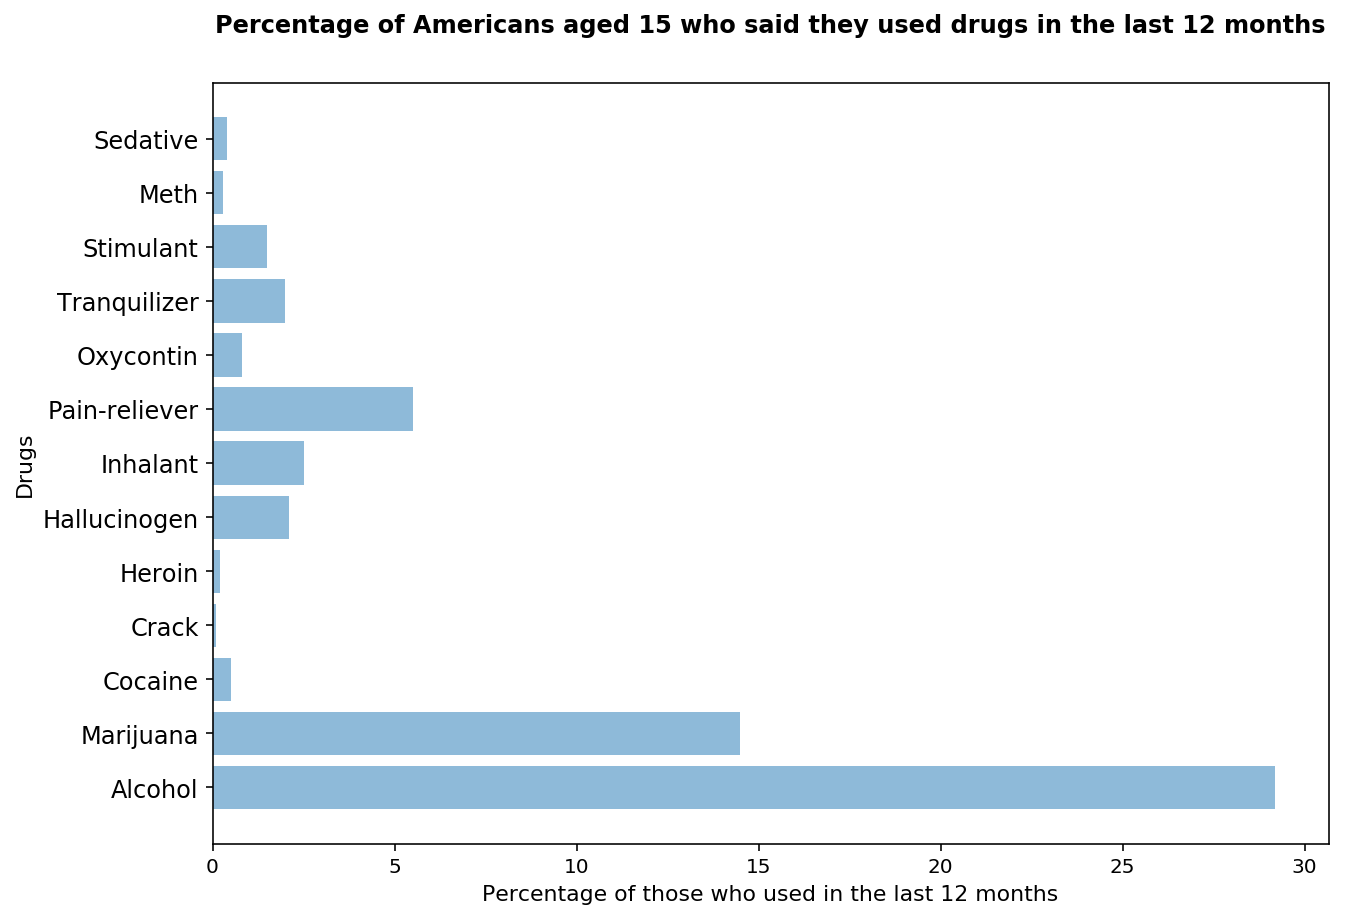

In [37]:
# Setting the plot figure size
plt.figure(figsize=(10,7))

# Plotting the drug usage for this age group
plt.barh(y=[d.replace('-use','').capitalize() for d in drug_use.columns], width=list(drug_use.iloc[3,:]), alpha=0.5)

# Adding title, x & y labels and formatting
plt.yticks(fontsize=12)
plt.ylabel('Drugs', fontsize=11)
plt.xlabel('Percentage of those who used in the last 12 months', fontsize=11)
plt.title('Percentage of Americans aged 15 who said they used drugs in the last 12 months', fontsize=12, fontweight='bold').set_position([.5, 1.05])
plt.show()

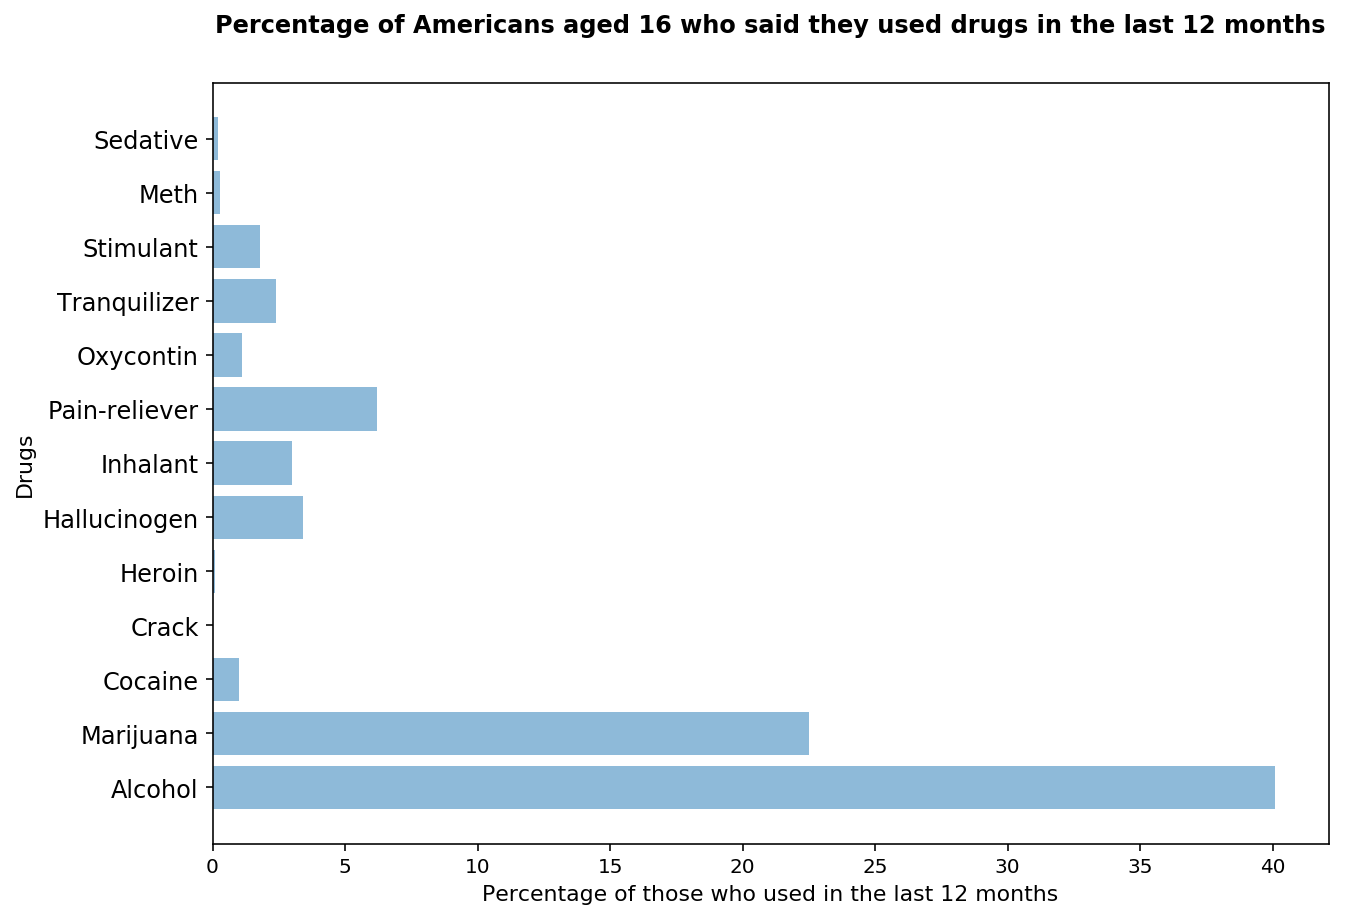

In [38]:
# Setting the plot figure size
plt.figure(figsize=(10,7))

# Plotting the drug usage for this age group
plt.barh(y=[d.replace('-use','').capitalize() for d in drug_use.columns], width=list(drug_use.iloc[4,:]), alpha=0.5)

# Adding title, x & y labels and formatting
plt.yticks(fontsize=12)
plt.ylabel('Drugs', fontsize=11)
plt.xlabel('Percentage of those who used in the last 12 months', fontsize=11)
plt.title('Percentage of Americans aged 16 who said they used drugs in the last 12 months', fontsize=12, fontweight='bold').set_position([.5, 1.05])
plt.show()

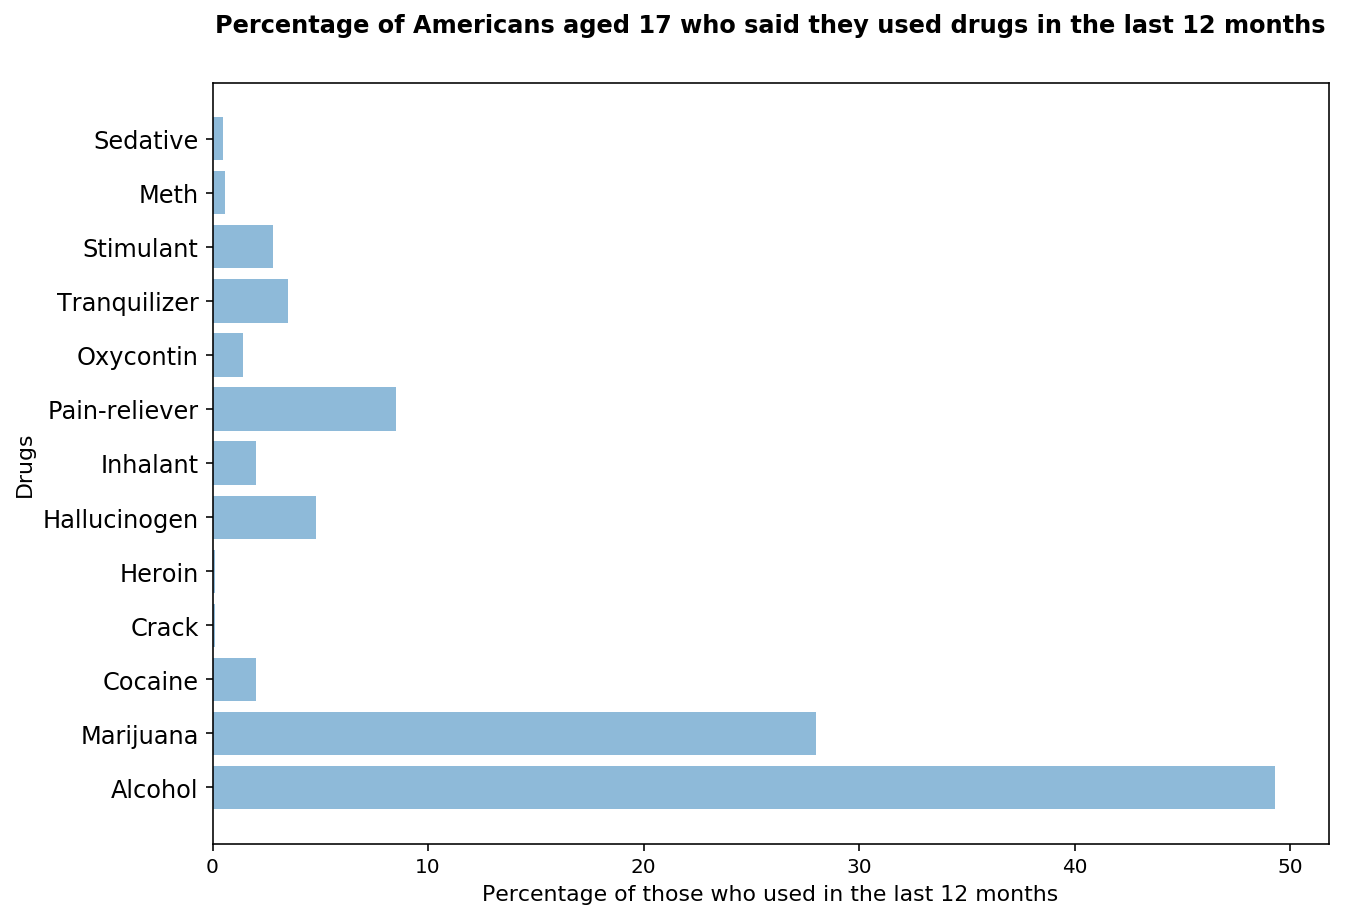

In [39]:
# Setting the plot figure size
plt.figure(figsize=(10,7))

# Plotting the drug usage for this age group
plt.barh(y=[d.replace('-use','').capitalize() for d in drug_use.columns], width=list(drug_use.iloc[5,:]), alpha=0.5)

# Adding title, x & y labels and formatting
plt.yticks(fontsize=12)
plt.ylabel('Drugs', fontsize=11)
plt.xlabel('Percentage of those who used in the last 12 months', fontsize=11)
plt.title('Percentage of Americans aged 17 who said they used drugs in the last 12 months', fontsize=12, fontweight='bold').set_position([.5, 1.05])
plt.show()

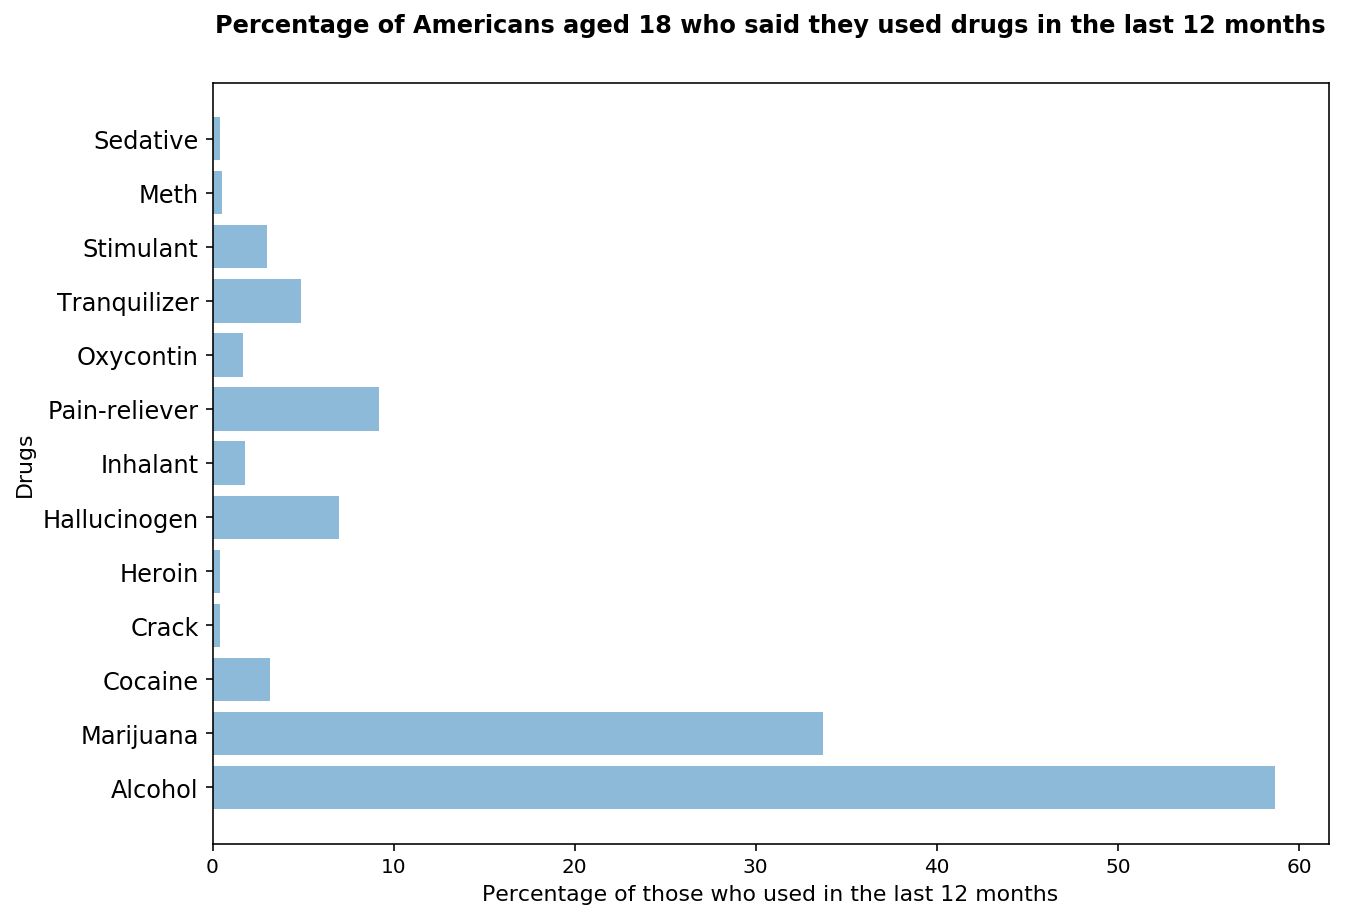

In [40]:
# Setting the plot figure size
plt.figure(figsize=(10,7))

# Plotting the drug usage for this age group
plt.barh(y=[d.replace('-use','').capitalize() for d in drug_use.columns], width=list(drug_use.iloc[6,:]), alpha=0.5)

# Adding title, x & y labels and formatting
plt.yticks(fontsize=12)
plt.ylabel('Drugs', fontsize=11)
plt.xlabel('Percentage of those who used in the last 12 months', fontsize=11)
plt.title('Percentage of Americans aged 18 who said they used drugs in the last 12 months', fontsize=12, fontweight='bold').set_position([.5, 1.05])
plt.show()

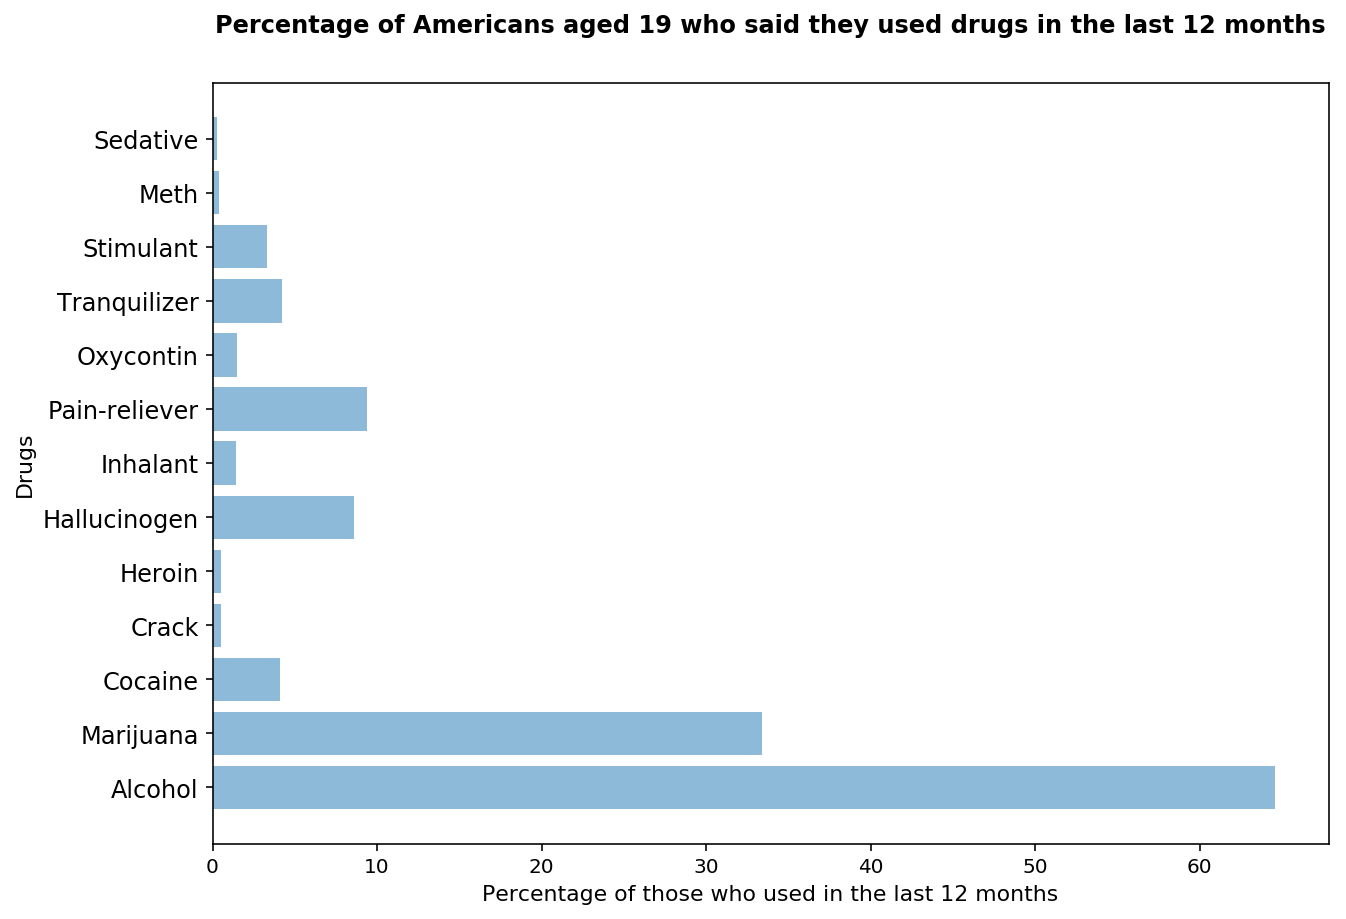

In [41]:
# Setting the plot figure size
plt.figure(figsize=(10,7))

# Plotting the drug usage for this age group
plt.barh(y=[d.replace('-use','').capitalize() for d in drug_use.columns], width=list(drug_use.iloc[7,:]), alpha=0.5)

# Adding title, x & y labels and formatting
plt.yticks(fontsize=12)
plt.ylabel('Drugs', fontsize=11)
plt.xlabel('Percentage of those who used in the last 12 months', fontsize=11)
plt.title('Percentage of Americans aged 19 who said they used drugs in the last 12 months', fontsize=12, fontweight='bold').set_position([.5, 1.05])
plt.show()

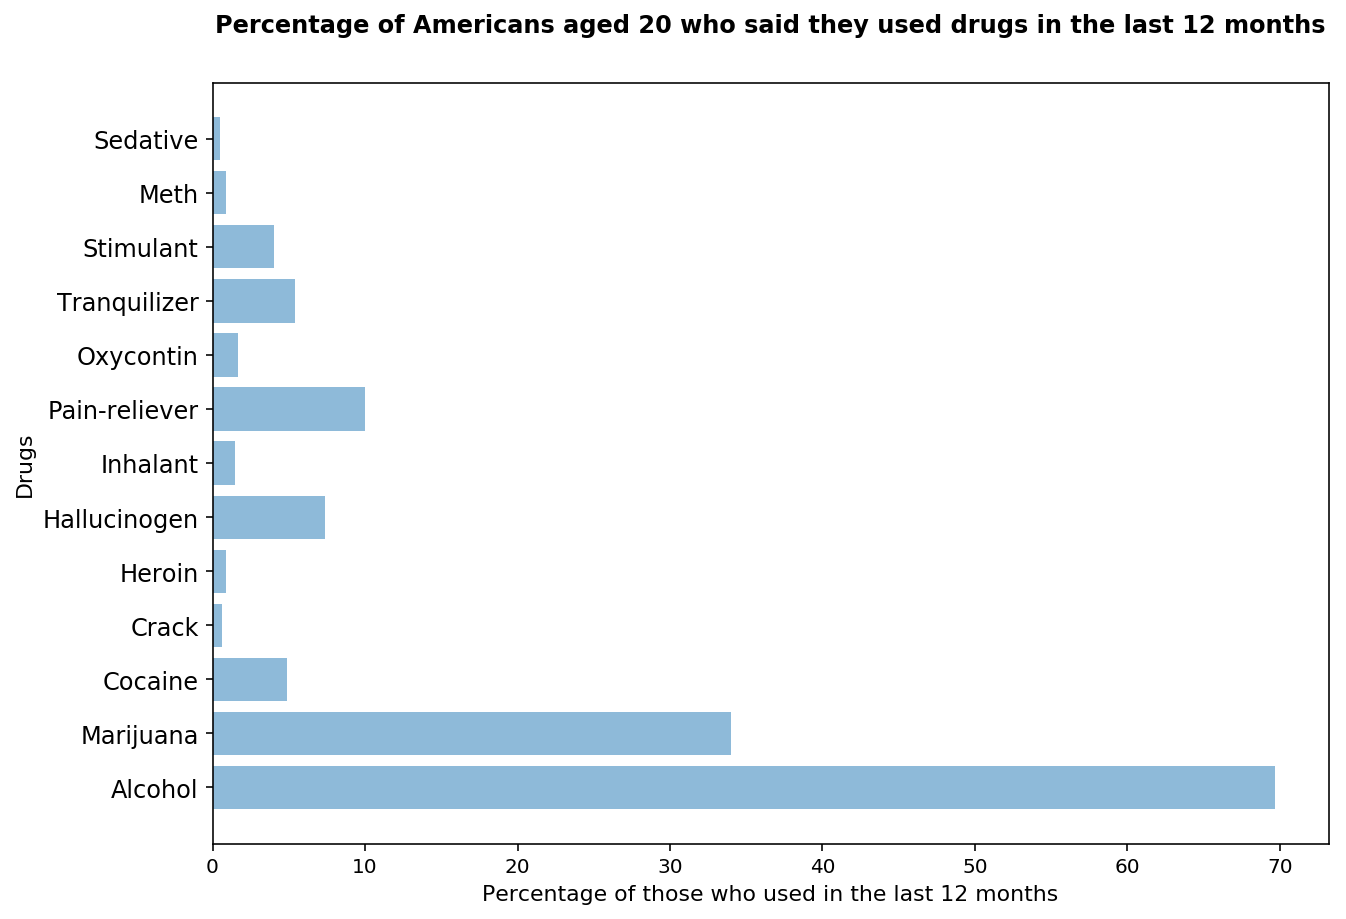

In [42]:
# Setting the plot figure size
plt.figure(figsize=(10,7))

# Plotting the drug usage for this age group
plt.barh(y=[d.replace('-use','').capitalize() for d in drug_use.columns], width=list(drug_use.iloc[8,:]), alpha=0.5)

# Adding title, x & y labels and formatting
plt.yticks(fontsize=12)
plt.ylabel('Drugs', fontsize=11)
plt.xlabel('Percentage of those who used in the last 12 months', fontsize=11)
plt.title('Percentage of Americans aged 20 who said they used drugs in the last 12 months', fontsize=12, fontweight='bold').set_position([.5, 1.05])
plt.show()

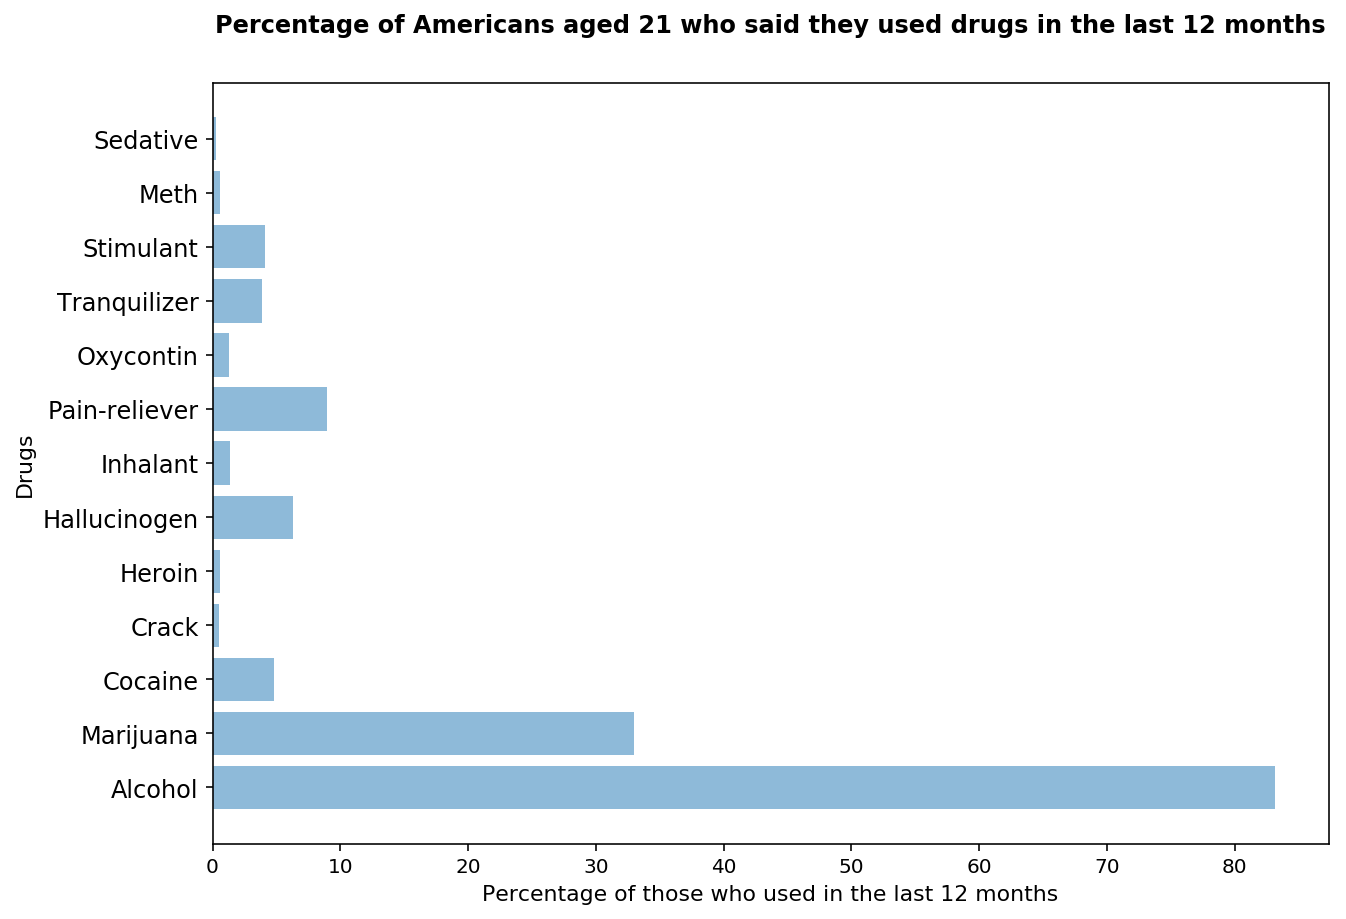

In [43]:
# Setting the plot figure size
plt.figure(figsize=(10,7))

# Plotting the drug usage for this age group
plt.barh(y=[d.replace('-use','').capitalize() for d in drug_use.columns], width=list(drug_use.iloc[9,:]), alpha=0.5)

# Adding title, x & y labels and formatting
plt.yticks(fontsize=12)
plt.ylabel('Drugs', fontsize=11)
plt.xlabel('Percentage of those who used in the last 12 months', fontsize=11)
plt.title('Percentage of Americans aged 21 who said they used drugs in the last 12 months', fontsize=12, fontweight='bold').set_position([.5, 1.05])
plt.show()

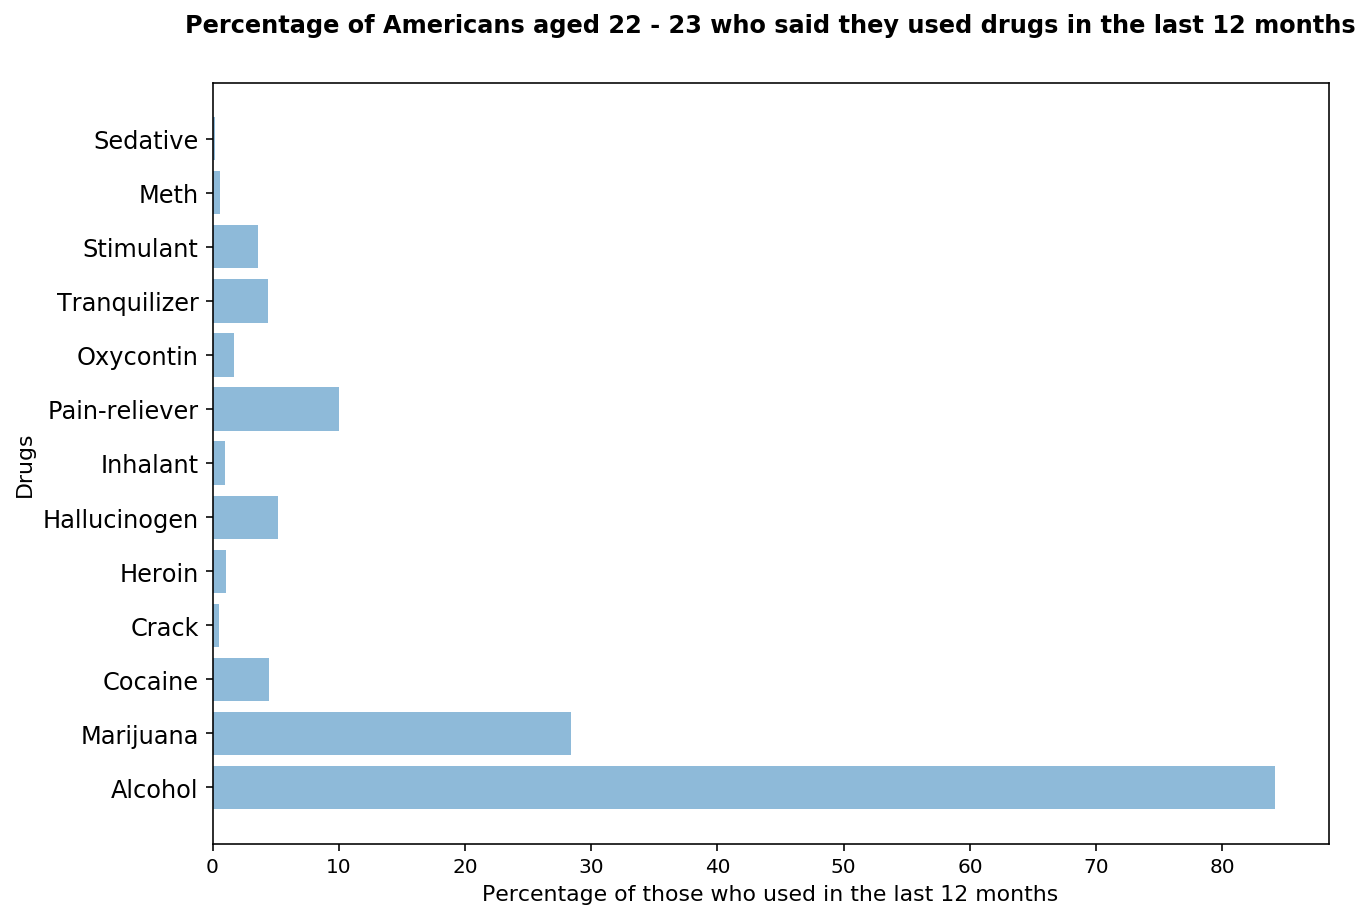

In [44]:
# Setting the plot figure size
plt.figure(figsize=(10,7))

# Plotting the drug usage for this age group
plt.barh(y=[d.replace('-use','').capitalize() for d in drug_use.columns], width=list(drug_use.iloc[10,:]), alpha=0.5)

# Adding title, x & y labels and formatting
plt.yticks(fontsize=12)
plt.ylabel('Drugs', fontsize=11)
plt.xlabel('Percentage of those who used in the last 12 months', fontsize=11)
plt.title('Percentage of Americans aged 22 - 23 who said they used drugs in the last 12 months', fontsize=12, fontweight='bold').set_position([.5, 1.05])
plt.show()

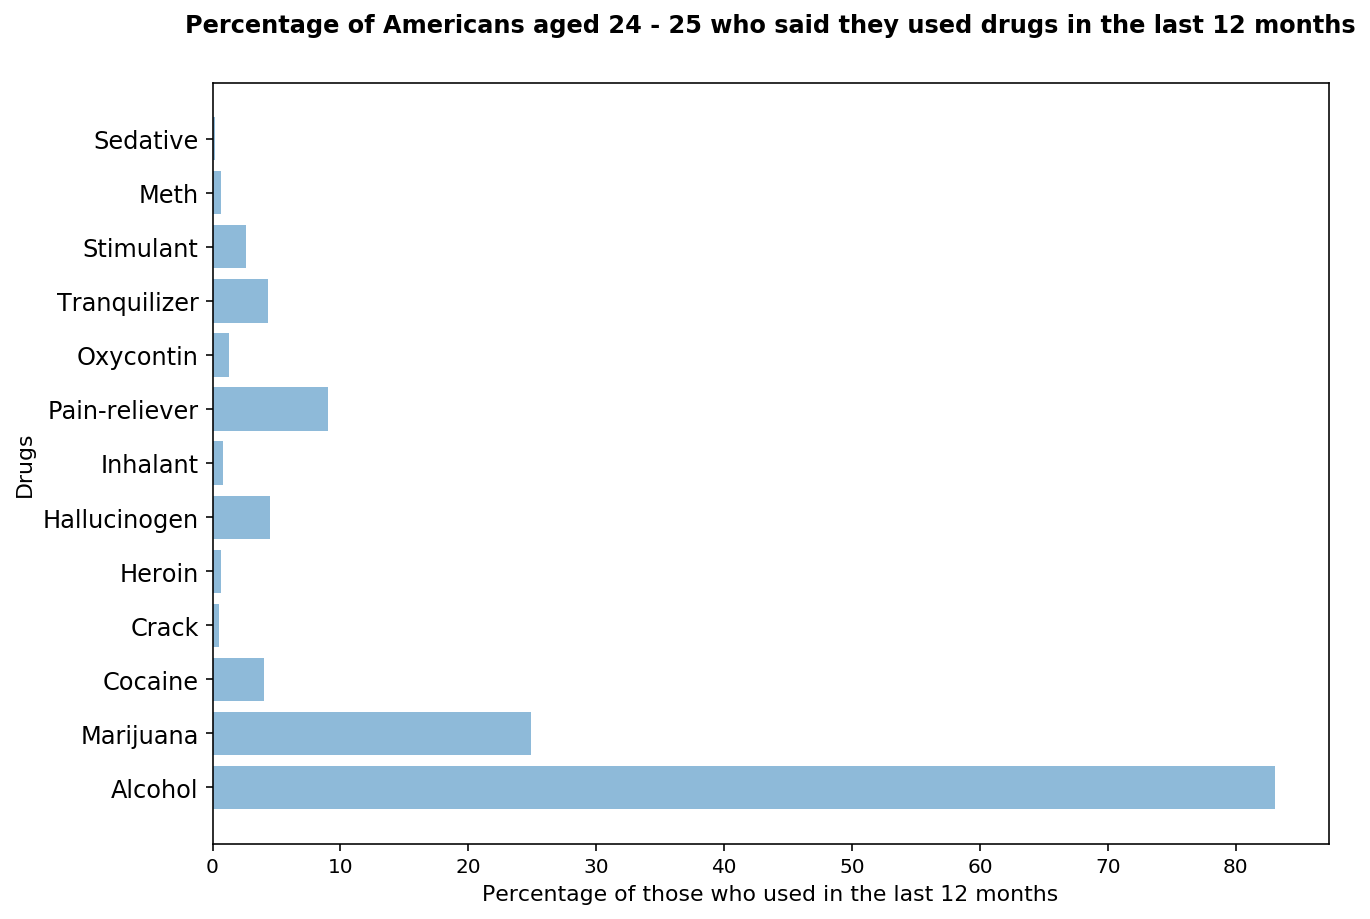

In [45]:
# Setting the plot figure size
plt.figure(figsize=(10,7))

# Plotting the drug usage for this age group
plt.barh(y=[d.replace('-use','').capitalize() for d in drug_use.columns], width=list(drug_use.iloc[11,:]), alpha=0.5)

# Adding title, x & y labels and formatting
plt.yticks(fontsize=12)
plt.ylabel('Drugs', fontsize=11)
plt.xlabel('Percentage of those who used in the last 12 months', fontsize=11)
plt.title('Percentage of Americans aged 24 - 25 who said they used drugs in the last 12 months', fontsize=12, fontweight='bold').set_position([.5, 1.05])
plt.show()

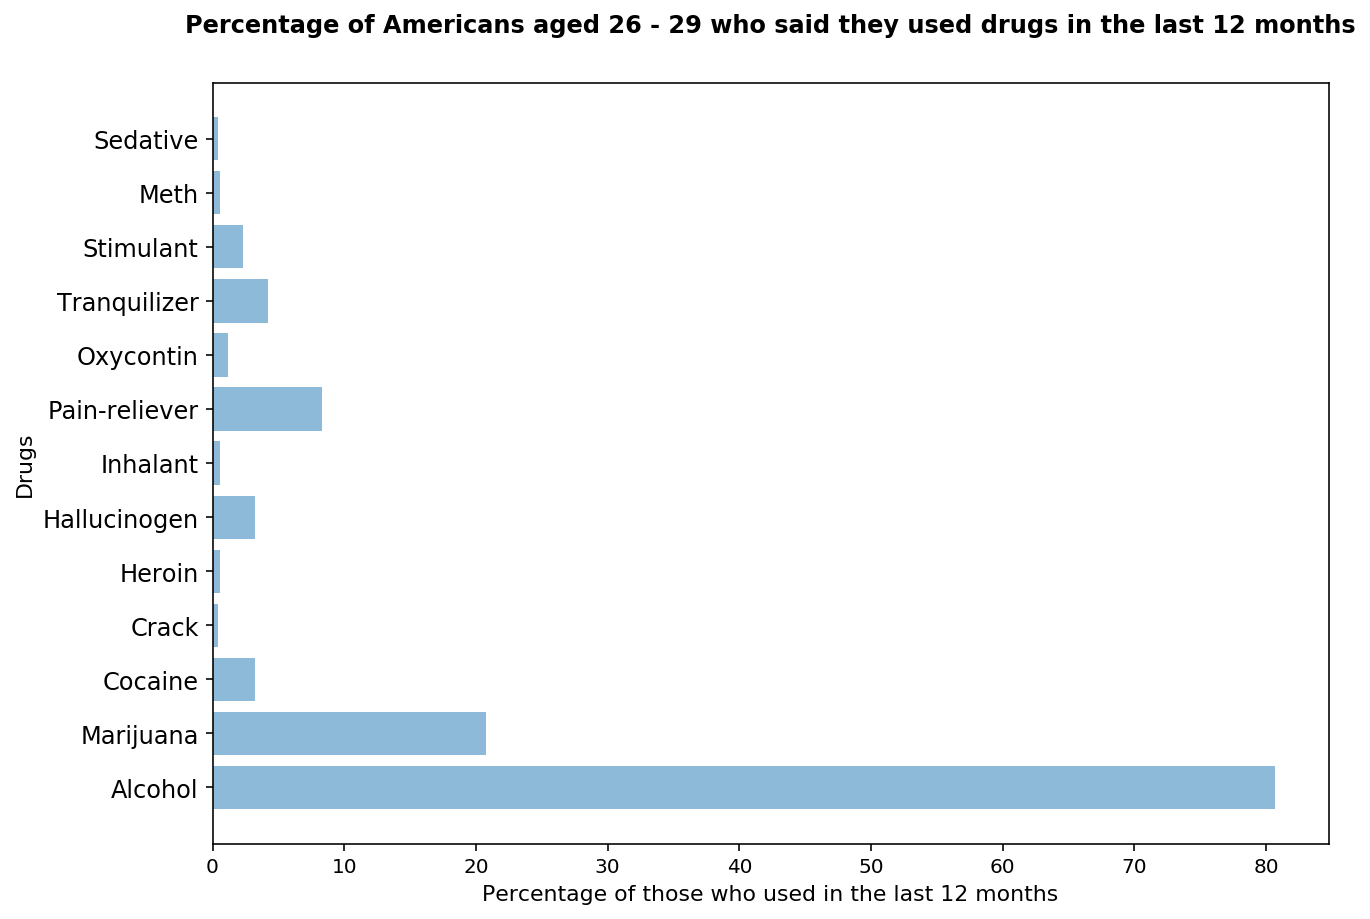

In [46]:
# Setting the plot figure size
plt.figure(figsize=(10,7))

# Plotting the drug usage for this age group
plt.barh(y=[d.replace('-use','').capitalize() for d in drug_use.columns], width=list(drug_use.iloc[12,:]), alpha=0.5)

# Adding title, x & y labels and formatting
plt.yticks(fontsize=12)
plt.ylabel('Drugs', fontsize=11)
plt.xlabel('Percentage of those who used in the last 12 months', fontsize=11)
plt.title('Percentage of Americans aged 26 - 29 who said they used drugs in the last 12 months', fontsize=12, fontweight='bold').set_position([.5, 1.05])
plt.show()

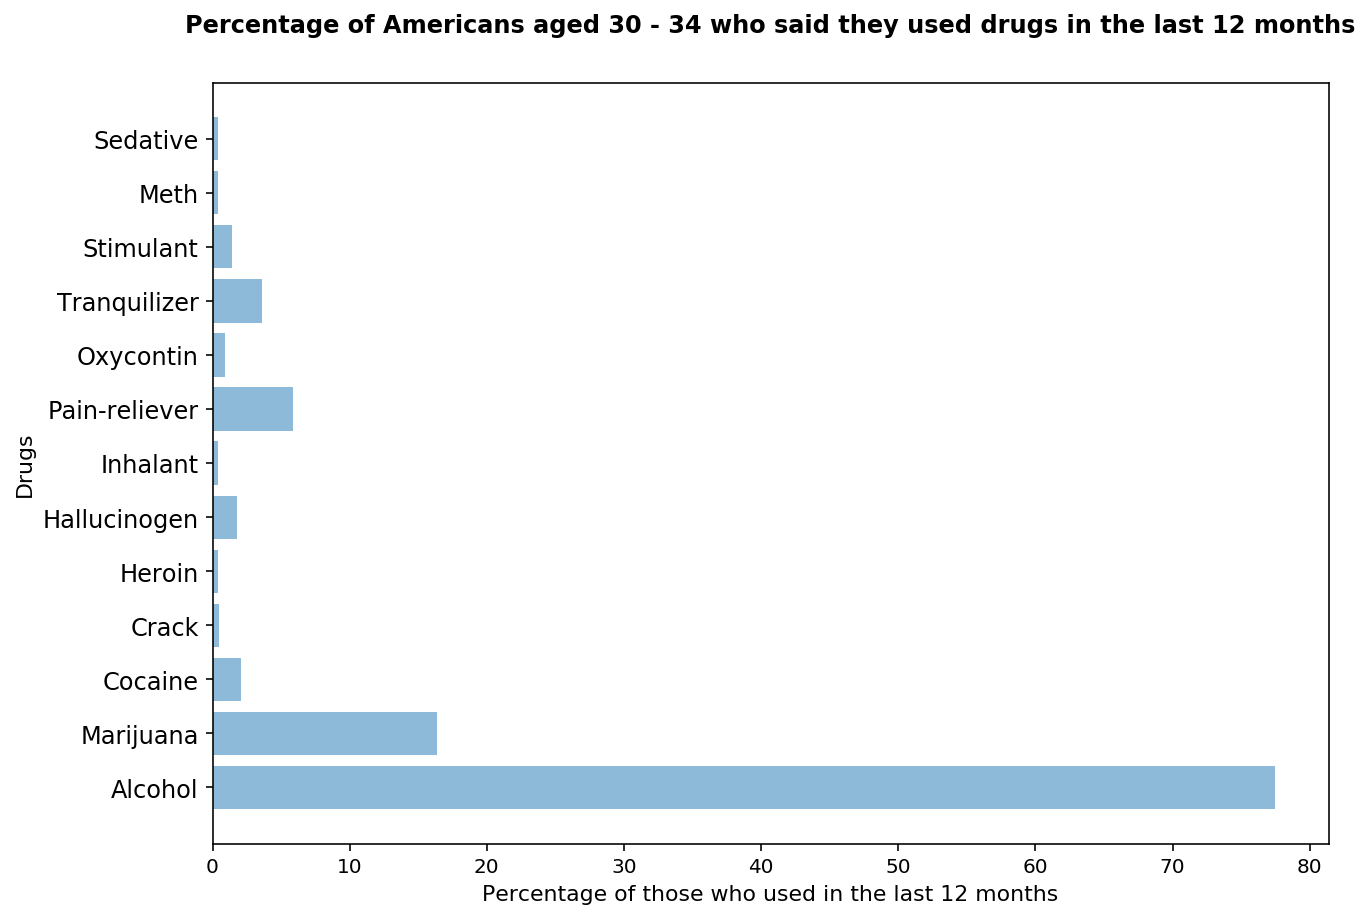

In [47]:
# Setting the plot figure size
plt.figure(figsize=(10,7))

# Plotting the drug usage for this age group
plt.barh(y=[d.replace('-use','').capitalize() for d in drug_use.columns], width=list(drug_use.iloc[13,:]), alpha=0.5)

# Adding title, x & y labels and formatting
plt.yticks(fontsize=12)
plt.ylabel('Drugs', fontsize=11)
plt.xlabel('Percentage of those who used in the last 12 months', fontsize=11)
plt.title('Percentage of Americans aged 30 - 34 who said they used drugs in the last 12 months', fontsize=12, fontweight='bold').set_position([.5, 1.05])
plt.show()

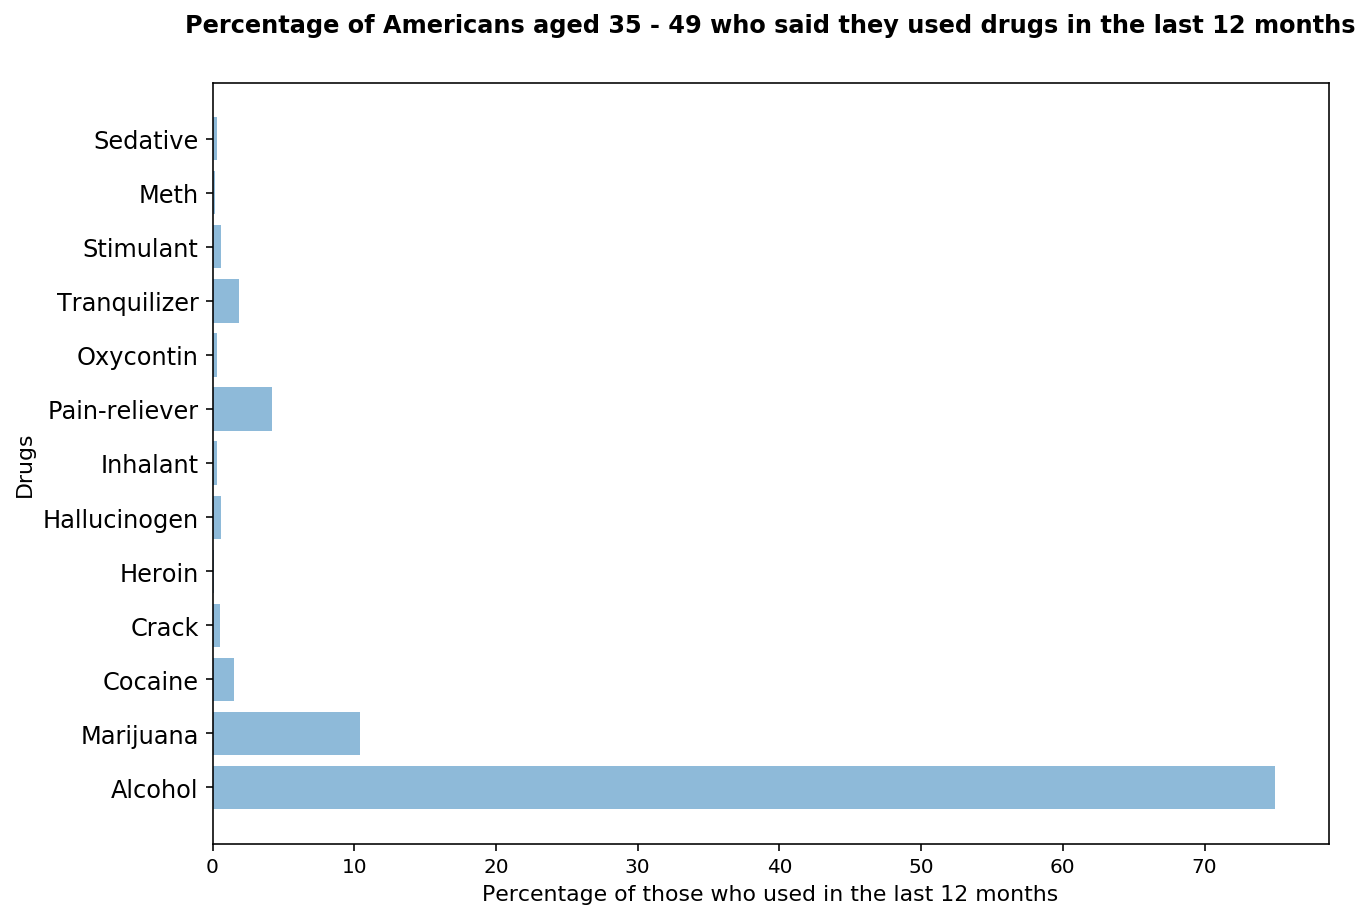

In [48]:
# Setting the plot figure size
plt.figure(figsize=(10,7))

# Plotting the drug usage for this age group
plt.barh(y=[d.replace('-use','').capitalize() for d in drug_use.columns], width=list(drug_use.iloc[14,:]), alpha=0.5)

# Adding title, x & y labels and formatting
plt.yticks(fontsize=12)
plt.ylabel('Drugs', fontsize=11)
plt.xlabel('Percentage of those who used in the last 12 months', fontsize=11)
plt.title('Percentage of Americans aged 35 - 49 who said they used drugs in the last 12 months', fontsize=12, fontweight='bold').set_position([.5, 1.05])
plt.show()

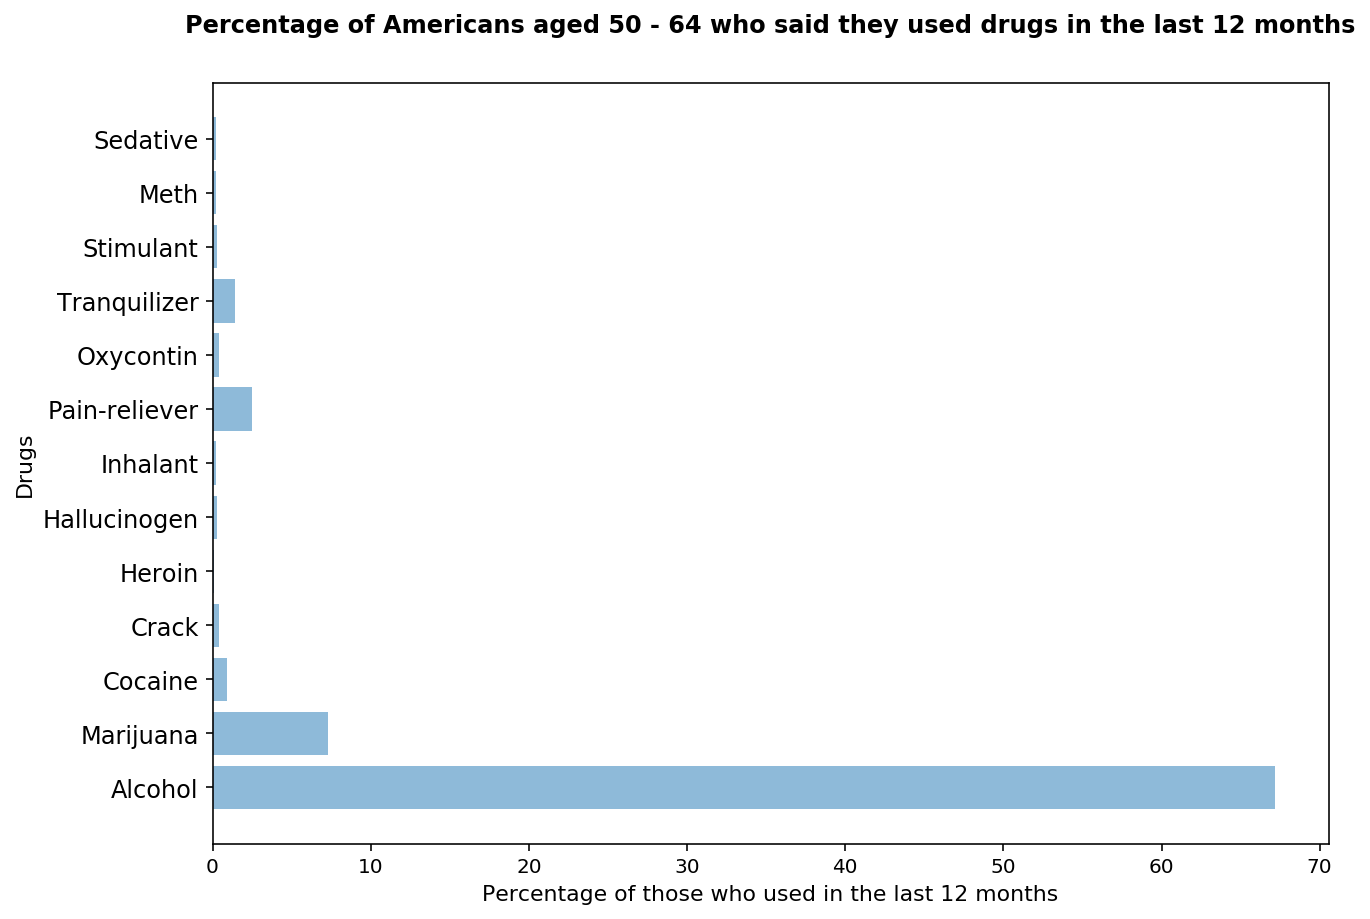

In [49]:
# Setting the plot figure size
plt.figure(figsize=(10,7))

# Plotting the drug usage for this age group
plt.barh(y=[d.replace('-use','').capitalize() for d in drug_use.columns], width=list(drug_use.iloc[15,:]), alpha=0.5)

# Adding title, x & y labels and formatting
plt.yticks(fontsize=12)
plt.ylabel('Drugs', fontsize=11)
plt.xlabel('Percentage of those who used in the last 12 months', fontsize=11)
plt.title('Percentage of Americans aged 50 - 64 who said they used drugs in the last 12 months', fontsize=12, fontweight='bold').set_position([.5, 1.05])
plt.show()

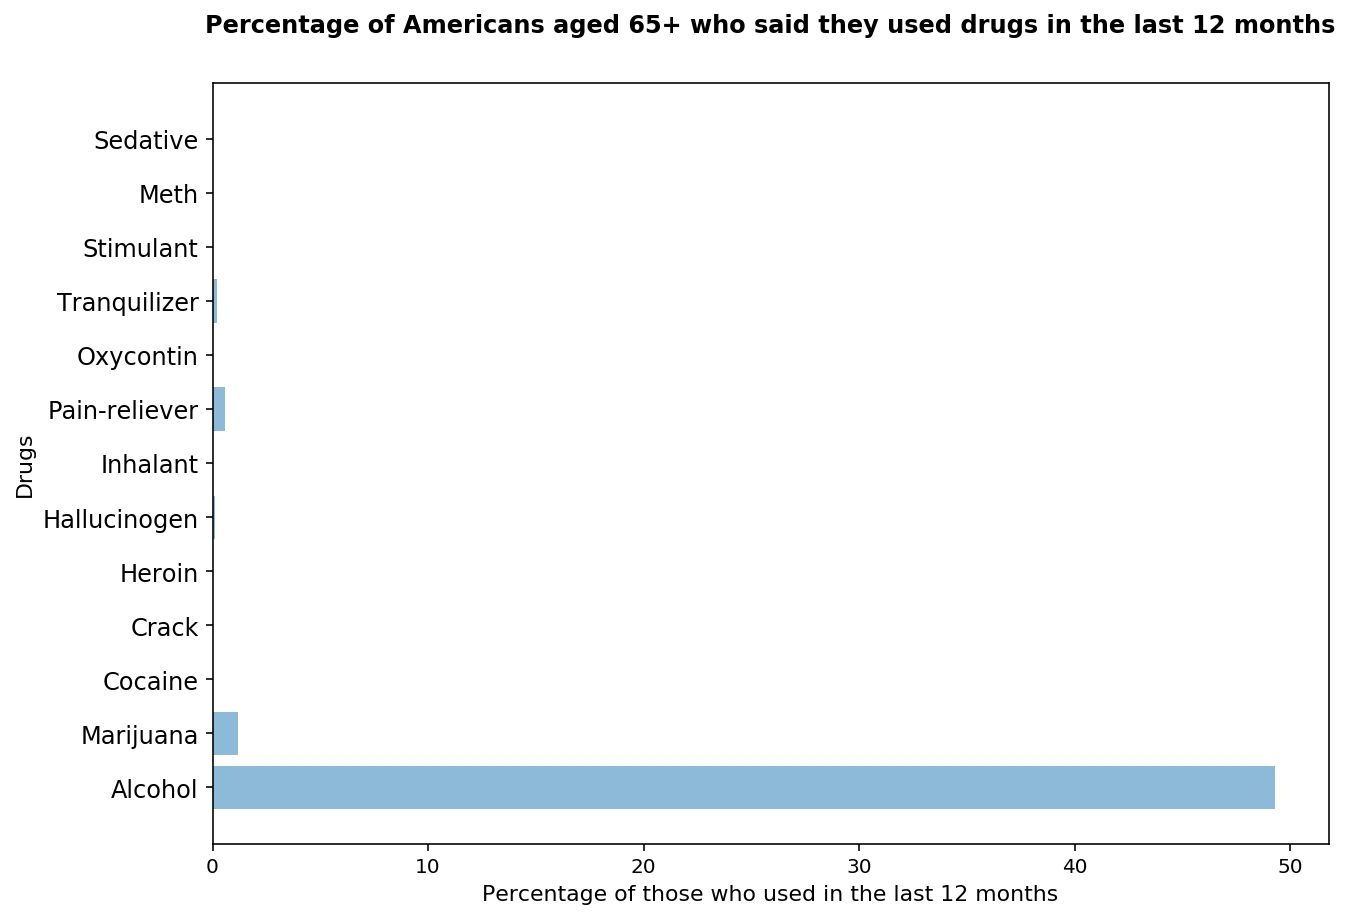

In [50]:
# Setting the plot figure size
plt.figure(figsize=(10,7))

# Plotting the drug usage for this age group
plt.barh(y=[d.replace('-use','').capitalize() for d in drug_use.columns], width=list(drug_use.iloc[16,:]), alpha=0.5)

# Adding title, x & y labels and formatting
plt.yticks(fontsize=12)
plt.ylabel('Drugs', fontsize=11)
plt.xlabel('Percentage of those who used in the last 12 months', fontsize=11)
plt.title('Percentage of Americans aged 65+ who said they used drugs in the last 12 months', fontsize=12, fontweight='bold').set_position([.5, 1.05])
plt.show()

In [51]:
# Creating a DataFrame containing only the drug use data
drug_freq = drug[[d for d in drug.columns if "frequency" in d]]

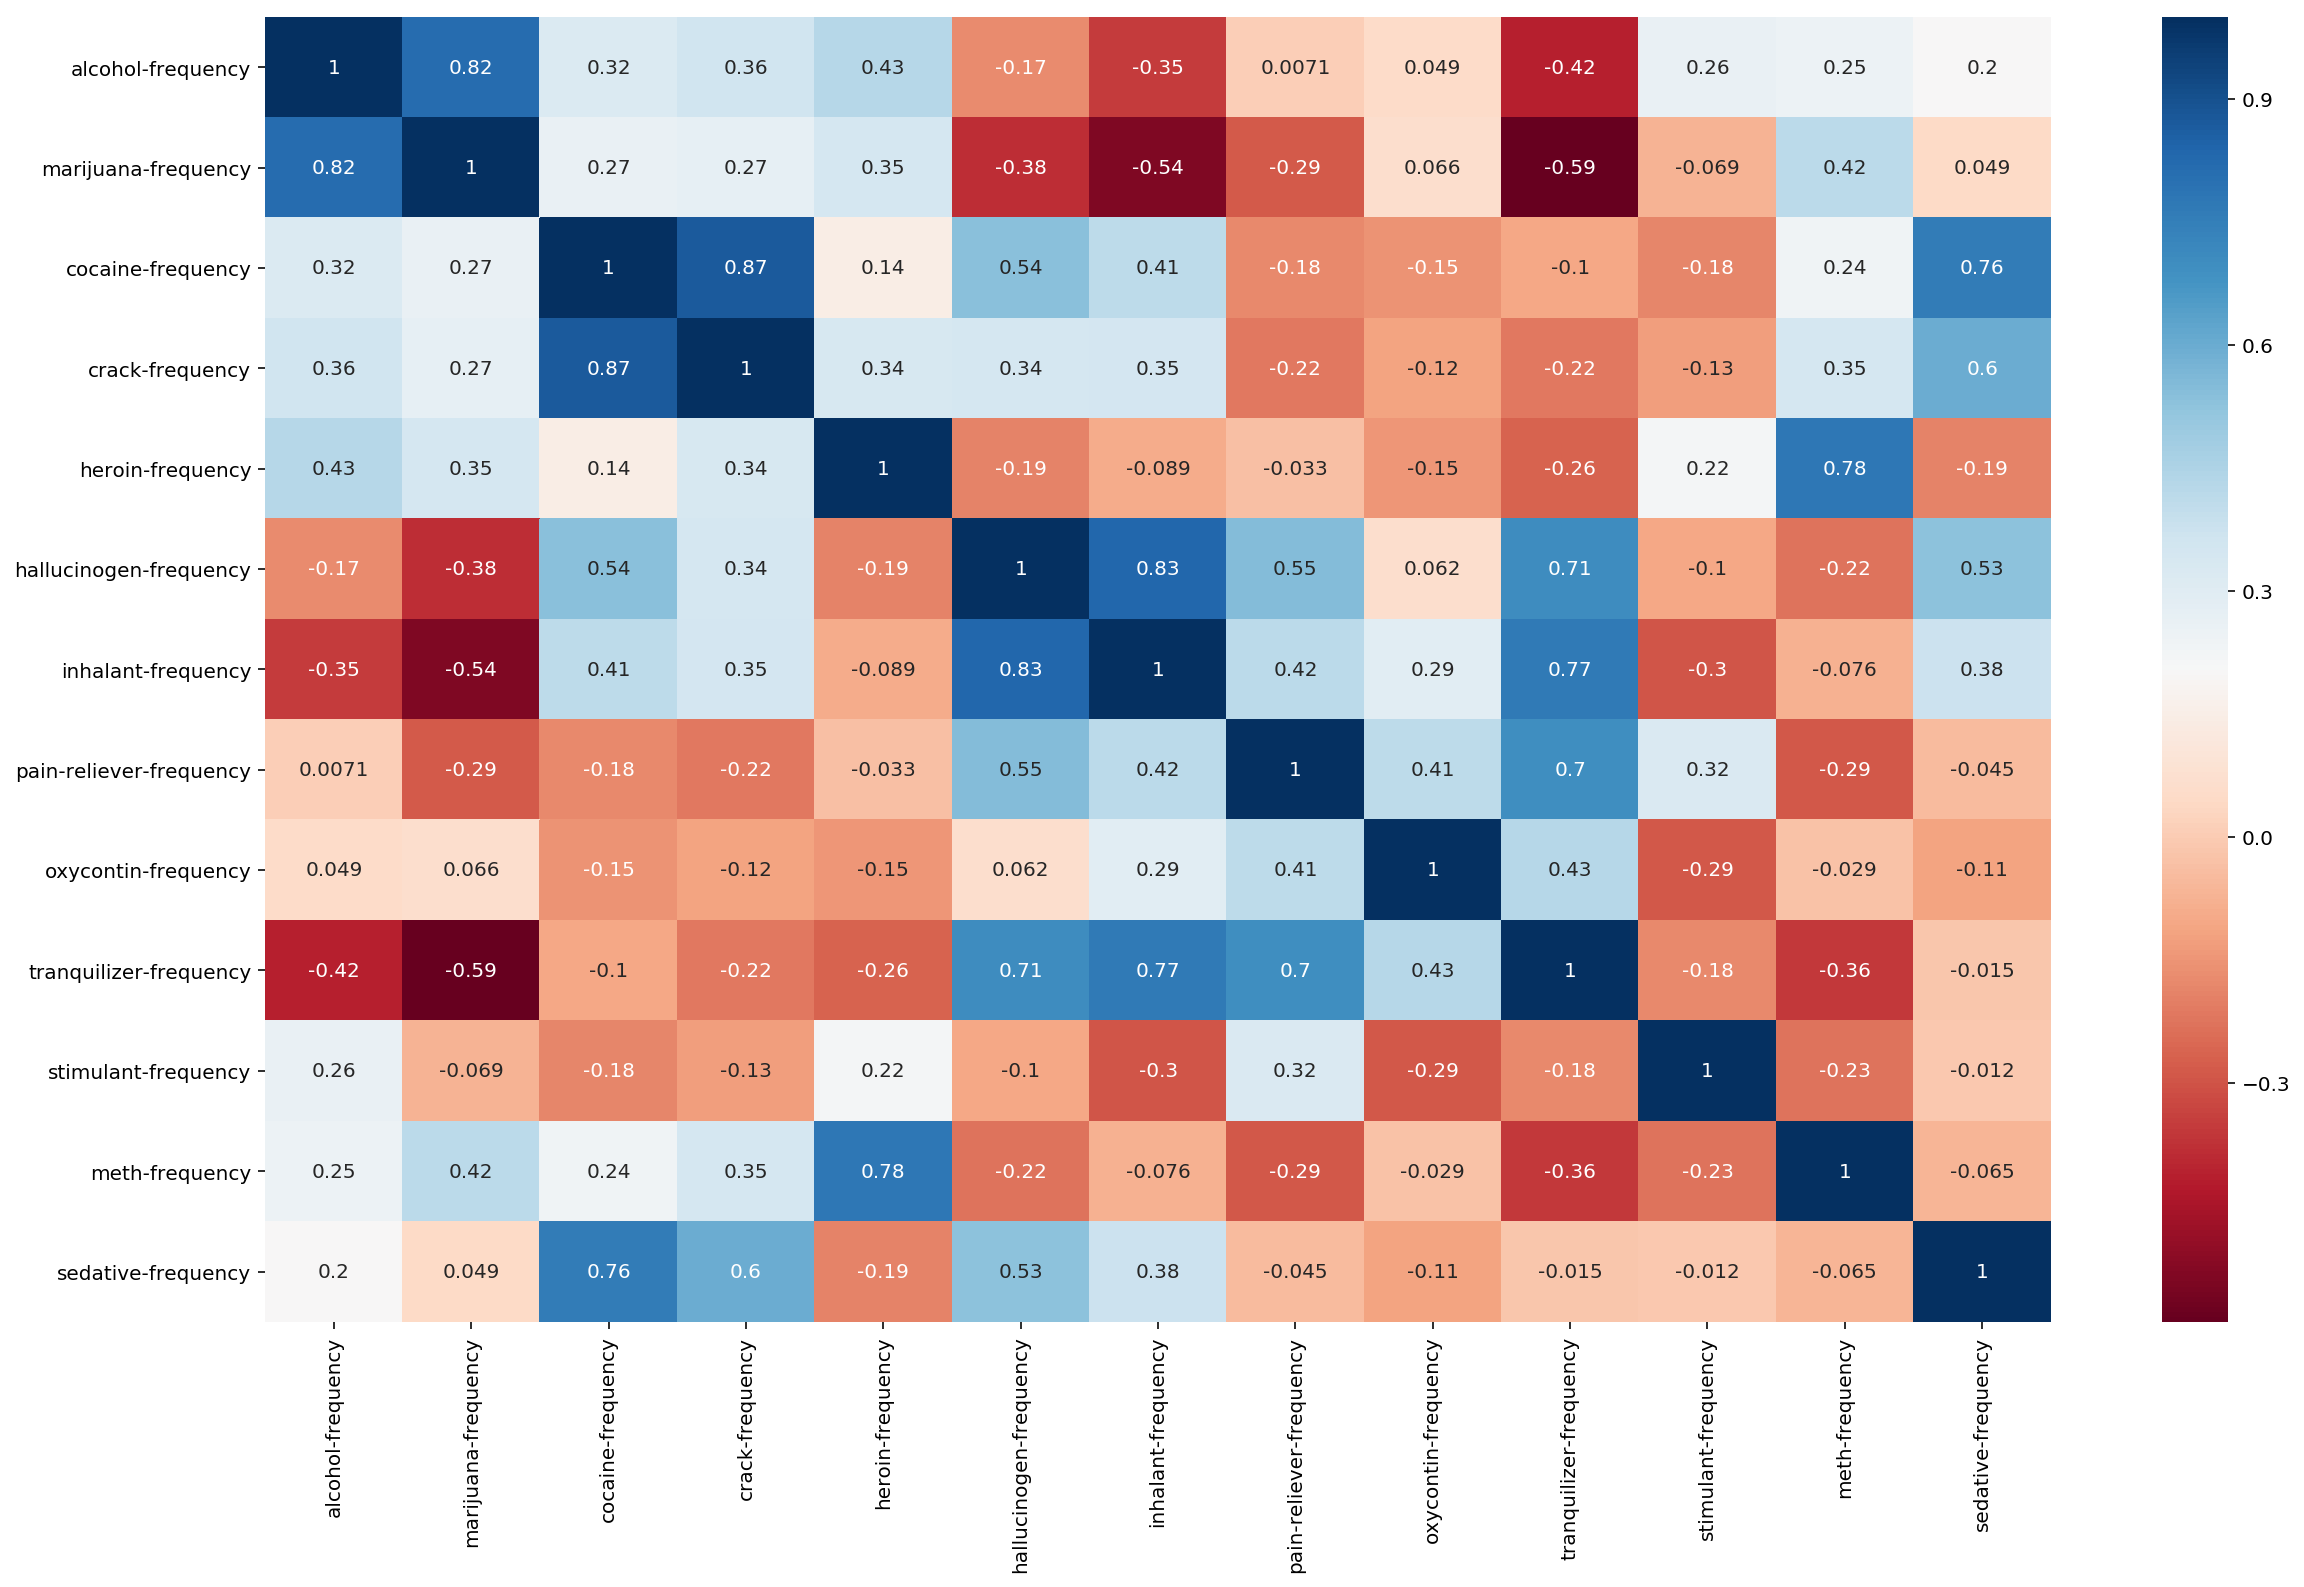

In [52]:
# Visualizing the correlation of the various drug frequencies via seaborn's heatmap
plt.figure(figsize=(20,12))
sns.heatmap(drug_freq.corr(), annot=True, cmap='RdBu')
plt.show()

#### Observations and high level overview

- Alcohol and marijuana are the top 2 drug used across all age groups. 
- The use of inhalants is the least correlated to the other drugs.
- There are several pairs of drugs which have relatively high correlation in their drug use frequencies:
    - Alcohol & Marijuana
    - Crack & Cocaine
    - Inhalant & Hallucinogen
    - Meth & Heroin
    - Sedative & Cocaine

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

### Classification of drugs based on effect

https://www.addictioncenter.com/drugs/drug-classifications/

#### Depressants
More commonly referred to as “downers,” depressants create feelings of relaxation and tiredness. While many serve legitimate purposes in the fight against mental illness and sleep deprivation, they are very commonly abused because they may also create feelings of euphoria. Depressants are not only some of the most highly addictive drugs, but they are also some of the most highly dangerous and likely to cause overdose. Examples of depressants include:

- Alcohol
- Opiates
- Barbiturates

#### Stimulants
Also known as “uppers,” the primary use of stimulants is to increase energy, concentration, and wakefulness. Stimulants are said to provide a “rush.” In the short term, stimulants are believed to increase productivity and performance, while producing an excited high of pleasure. In the long term, stimulants are incredibly addictive and have a very high potential for abuse. Examples of stimulants include:

- Adderall
- Cocaine
- Meth

#### Hallucinogens
Hallucinogens, sometimes referred to as dissociatives, alter the user’s perception of reality, often resulting in auditory and visual hallucinations, a process known as “tripping.” Although hallucinogens are generally less addictive than other drug classifications, their immediate impacts are generally more severe and dangerous. Examples of hallucinogens include:

- LSD
- Psilocybin Mushrooms
- PCP

#### Inhalants
Inhalants are a vast range of chemicals that are ingested primarily by breathing them in, or huffing. Most inhalants are commonly used materials that are in no way designed to be ingested by humans. While there is incredibly variety between inhalants, most produce feelings of a high. Inhalants are less studied than most other drugs. While they tend to be less addictive than many other substances, the use of inhalants is incredibly dangerous and causes many serious health effects. Examples of commonly abused inhalants include:

- Paint thinner
- Nail polish remover
- Gasoline

### Classifying the various ages

- Teens: 12 to 18
- Young Adults: 19 to 29
- Adults: 30 to 49
- Seniors: 50 to 64
- Retirees: 65+

#### Question
Are teens more likely to abuse stimulant drugs compared to the seniors?

#### Deliverables
Proportions of teens and seniors who used stimulants in the last 12 months
Chi-squared test and conclusion

In [53]:
# Converting the drug usage from percentage of those in an age group to actual counts
drug_use['age'] = drug['age']
drug_use['n'] = drug['n']
drug_use['alcohol-use'] = drug_use['alcohol-use'] * drug_use['n'] / 100
drug_use['marijuana-use'] = drug_use['marijuana-use'] * drug_use['n'] / 100
drug_use['cocaine-use'] = drug_use['cocaine-use'] * drug_use['n'] / 100
drug_use['crack-use'] = drug_use['crack-use'] * drug_use['n'] / 100
drug_use['heroin-use'] = drug_use['heroin-use'] * drug_use['n'] / 100
drug_use['hallucinogen-use'] = drug_use['hallucinogen-use'] * drug_use['n'] / 100
drug_use['inhalant-use'] = drug_use['inhalant-use'] * drug_use['n'] / 100
drug_use['pain-reliever-use'] = drug_use['pain-reliever-use'] * drug_use['n'] / 100
drug_use['oxycontin-use'] = drug_use['oxycontin-use'] * drug_use['n'] / 100
drug_use['tranquilizer-use'] = drug_use['tranquilizer-use'] * drug_use['n'] / 100
drug_use['stimulant-use'] = drug_use['stimulant-use'] * drug_use['n'] / 100
drug_use['meth-use'] = drug_use['meth-use'] * drug_use['n'] / 100
drug_use['sedative-use'] = drug_use['sedative-use'] * drug_use['n'] / 100

# Classifying the drugs into 5 broad categories
depressants = ['alcohol-use', 'heroin-use', 'oxycontin-use', 'tranquilizer-use', 'sedative-use']
stimulants = ['cocaine-use', 'crack-use', 'stimulant-use', 'meth-use']
hallucinogens = ['hallucinogen-use']
inhalants = ['inhalant-use']
others = ['marijuana-use', 'pain-reliever-use']

# Aggregating the columns of drug usages into the 5 broad categories
drug_use['depressants'] = drug_use.loc[:,depressants].sum(axis=1)
drug_use['stimulants'] = drug_use.loc[:,stimulants].sum(axis=1)
drug_use['hallucinogens'] = drug_use.loc[:,hallucinogens].sum(axis=1)
drug_use['inhalants'] = drug_use.loc[:,inhalants].sum(axis=1)
drug_use['others'] = drug_use.loc[:,others].sum(axis=1)

# Creating a new 'n' for the 5 broad drug categories
drug_use['n_depressants'] = drug_use['n'] * len(depressants)
drug_use['n_stimulants'] = drug_use['n'] * len(stimulants)
drug_use['n_hallucinogens'] = drug_use['n'] * len(hallucinogens)
drug_use['n_inhalants'] = drug_use['n'] * len(inhalants)
drug_use['n_others'] = drug_use['n'] * len(others)

# Classifying ages into 5 broad categories
teens = [0, 1, 2, 3, 4, 5, 6]
young_adults = [7, 8, 9, 10, 11, 12]
adults = [13, 14]
seniors = [15]
retirees = [16]

# Aggregating the rows of ages into the 5 broad categories
drug_use.loc['teens'] = drug_use.loc[teens,:].sum()
drug_use.loc['young_adults'] = drug_use.loc[young_adults,:].sum()
drug_use.loc['adults'] = drug_use.loc[adults,:].sum()
drug_use.loc['seniors'] = drug_use.loc[seniors,:].sum()
drug_use.loc['retirees'] = drug_use.loc[retirees,:].sum()

# Reshaping the DataFrame & removing unwanted rows/columns
df_drug = drug_use.drop(['alcohol-use'
                       ,'marijuana-use'
                       ,'cocaine-use'
                       ,'crack-use'
                       ,'heroin-use'
                       ,'hallucinogen-use'
                       ,'inhalant-use'
                       ,'pain-reliever-use'
                       ,'oxycontin-use'
                       ,'tranquilizer-use'
                       ,'stimulant-use'
                       ,'meth-use'
                       ,'sedative-use'
                       ,'age'
                       ,'n'], axis=1)

df_drug.drop(df_drug.index[:17], inplace=True)

In [54]:
df_drug

,depressants,stimulants,hallucinogens,inhalants,others,n_depressants,n_stimulants,n_hallucinogens,n_inhalants,n_others
teens,6527.015,558.230,551.512,457.127,4235.353,99340.0,79472.0,19868.0,19868.0,39736.0
young_adults,16172.733,1618.055,1042.989,197.709,7067.949,93870.0,75096.0,18774.0,18774.0,37548.0
adults,8106.808,332.964,95.898,33.629,1717.758,51275.0,41020.0,10255.0,10255.0,20510.0
seniors,2718.639,70.614,11.769,7.846,384.454,19615.0,15692.0,3923.0,3923.0,7846.0
retirees,1211.760,0.000,2.448,0.000,44.064,12240.0,9792.0,2448.0,2448.0,4896.0


<Figure size 720x720 with 0 Axes>

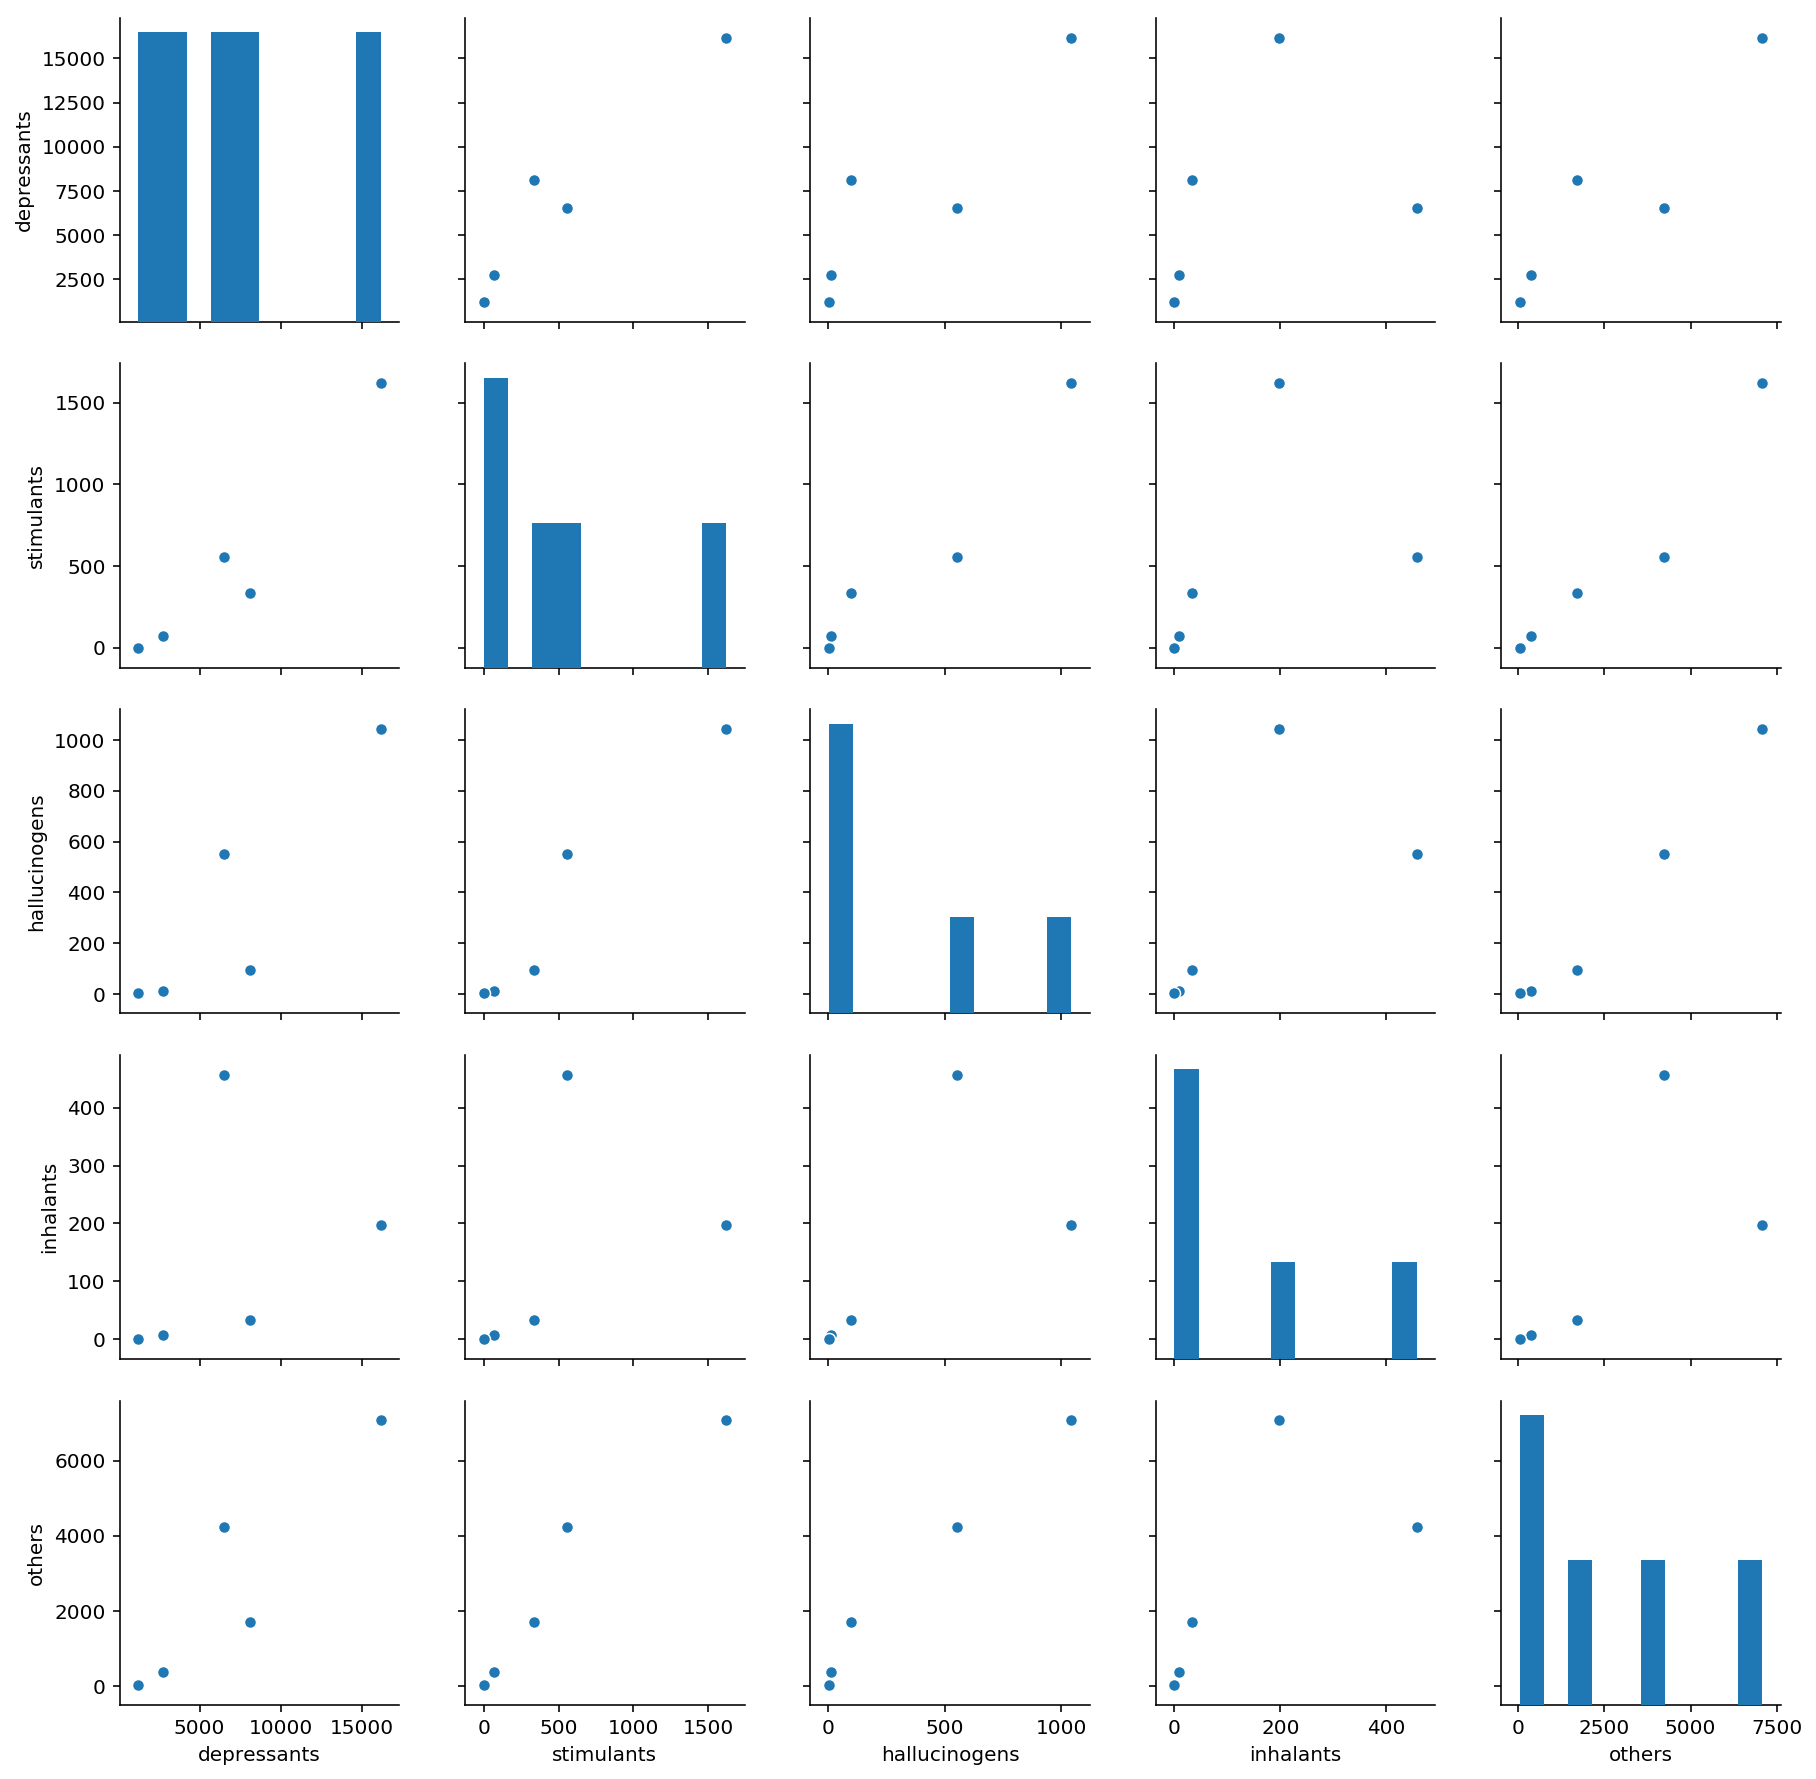

In [55]:
plt.figure(figsize=(10,10))
sns.pairplot(df_drug[['depressants', 'stimulants', 'hallucinogens', 'inhalants', 'others']])
plt.show()

In [56]:
# Printing out the proportion of stimulant usage for teens and seniors over the last 12 months
print("Proportion of stimulant abuse in teens:", df_drug['stimulants'][0] / df_drug['n_stimulants'][0])
print("Proportion of stimulant abuse in seniors:", df_drug['stimulants'][3] / df_drug['n_stimulants'][3])

Proportion of stimulant abuse in teens: 0.007024234950674451
Proportion of stimulant abuse in seniors: 0.0045000000000000005


In [57]:
# Setting up the variables for the chi-squared test
teen_use = df_drug['stimulants'][0]
teen_no = df_drug['n_stimulants'][0] - df_drug['stimulants'][0]
senior_use = df_drug['stimulants'][3]
senior_no = df_drug['n_stimulants'][3] - df_drug['stimulants'][3]

# Veriables for use and do not use stimulants of teens and seniors
teen = [teen_use, teen_no]
senior = [senior_use, senior_no]

In [58]:
# Chi-squared test
table = np.array([teen, senior])
results = stats.chi2_contingency(table)
chi2 = results[0]
pvalue = results[1]
print("Test statistic (chi-squared):", chi2)
print("p-value:", pvalue)

Test statistic (chi-squared): 12.338406746794202
p-value: 0.0004437335750297727


**Report**

Null Hypothesis (H0) : Teens are not more likely to abuse stimulant drugs compared to seniors

Alternative Hypothesis (H1): Teens are more likely to abuse stimulant drugs compared to seniors

Conclusions:
- p-value < 0.01
- Reject the null hypothesis
- There is a statistically significant difference between the two groups
- Teens are more likely to abuse stimulant drugs compared to seniors with a 99% confidence interval

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [59]:
# Creating a function to check for outliers

def outliercheck(column, data=sat_data):
    '''
    Function to check if there are any outliers in the data series.
    Prints out Median, 1st Quartile, 3rd Quartile, IQR, upper bound and lower bound
    Returns list of observations that are outliers (below lower bound, above upper bound)
    '''
    med = data[column].median()
    quart1 = data[column].quantile(0.25)
    quart3 = data[column].quantile(0.75)
    iqr = quart3 - quart1
    lower = quart1 - iqr * 1.5
    upper = quart3 + iqr * 1.5
    
    print("Median:", med)
    print("1st Quartile:", quart1)
    print("3rd Quartile:", quart3)
    print("IQR:", iqr)
    print("Lower bound:", lower)
    print("Upper bound:", upper)
    
    return [list(data[data[column] > upper][column]) + list(data[data[column] < lower][column])]

In [60]:
outliercheck('Rate')

Median: 33.5
1st Quartile: 9.0
3rd Quartile: 63.5
IQR: 54.5
Lower bound: -72.75
Upper bound: 145.25


[[]]

There are no outliers in the rate variable from the SAT dataset.

### Definition of an outlier
An outlier is an observation point that is distant from other observations (wikipedia)

We numerically define an outlier if it falls beyond the upper or lower bounds of the data. The upper and lower bounds are defined as 1.5 times of the interquartile range (IQR). 

From the calculations in the previous cell above, we can see that the lower bound for the rate variable is -72.75 and the upper bound is 145.25.

In [61]:
sat_data[['Rate', 'Verbal', 'Math']].describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


As there are no outliers to be removed from the 'Rate' variable. The mean, median, and standard deviation of the dataset remains unchanged.

In [62]:
# Checking for outliers in 'Math' variable
outliercheck('Math')

Median: 521.0
1st Quartile: 504.0
3rd Quartile: 555.75
IQR: 51.75
Lower bound: 426.375
Upper bound: 633.375


[[]]

In [63]:
# Checking for outliers in 'Verbal' variable
outliercheck('Verbal')

Median: 526.5
1st Quartile: 501.0
3rd Quartile: 562.0
IQR: 61.0
Lower bound: 409.5
Upper bound: 653.5


[[]]

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [64]:
# Calculating spearman's rank correlation of 'Verbal' and 'Math'
sat_data[['Verbal', 'Math']].corr(method='spearman')

,Verbal,Math
Verbal,1.000000,0.905205
Math,0.905205,1.000000


In [65]:
# Calculating pearson's correlation of 'Verbal' and 'Math'
sat_data[['Verbal', 'Math']].corr(method='pearson')

,Verbal,Math
Verbal,1.000000,0.899871
Math,0.899871,1.000000


1. Spearman rank correlation is computed on ranks and so depicts monotonic relationships while Pearson's correlation is on true values and depicts linear relationships. 


2. Step 1: Rank the values in the two columns from largest to smallest 

   Step 2: Take the difference of the ranks in each row and square it
   
   Step 3: Get the sum of the rank difference squared, d**2
   
   Step 4: Apply the rank difference squared into Spearman's Rank Correlation Coefficient formula
   
   ### $$ 1 - \frac{6*d^2}{n(n^2 - 1)}$$
   
   n is the number of pairs of data

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [66]:
# Converting the 'Rate' scores to percentiles and creating a new column for it
sat_data['Rate%'] = [stats.percentileofscore(sat_data['Rate'], i) for i in sat_data['Rate']]

In [67]:
# Displaying the SAT data of California with the 'Rate' percentile
sat_data[sat_data['State'] == 'CA'][['State', 'Rate%']]

,State,Rate%
23,CA,56.730769


#### Spearman rank correlation is simply Pearson's correlation applied on the percentile scoring

In [68]:
# Proof

sat_data['Verbal%'] = [stats.percentileofscore(sat_data['Verbal'], i) for i in sat_data['Verbal']]
sat_data['Math%'] = [stats.percentileofscore(sat_data['Math'], i) for i in sat_data['Math']]

print("Pearson's Correlation applied on Verbal & Math converted to percentiles")
print("="*40)
print(sat_data[['Verbal%', 'Math%']].corr(method='pearson'))
print()
print("Spearman's Rank Correlation applied on Verbal & Math")
print("="*40)
print(sat_data[['Verbal', 'Math']].corr(method='spearman'))

Pearson's Correlation applied on Verbal & Math converted to percentiles
          Verbal%     Math%
Verbal%  1.000000  0.905205
Math%    0.905205  1.000000

Spearman's Rank Correlation applied on Verbal & Math
          Verbal      Math
Verbal  1.000000  0.905205
Math    0.905205  1.000000


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

Percentiles scoring might be useful for deal with outliers as they are not impacted by them the same way that average and standard deviation are. Having outliers in a data set might skew the mean one way or the other. However, with percentile scoring the 50% stays the same even if the values at a tail end were to increase or decrease creating a positive or negative skew.

In [69]:
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-reliever-use,pain-reliever-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,0.0,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


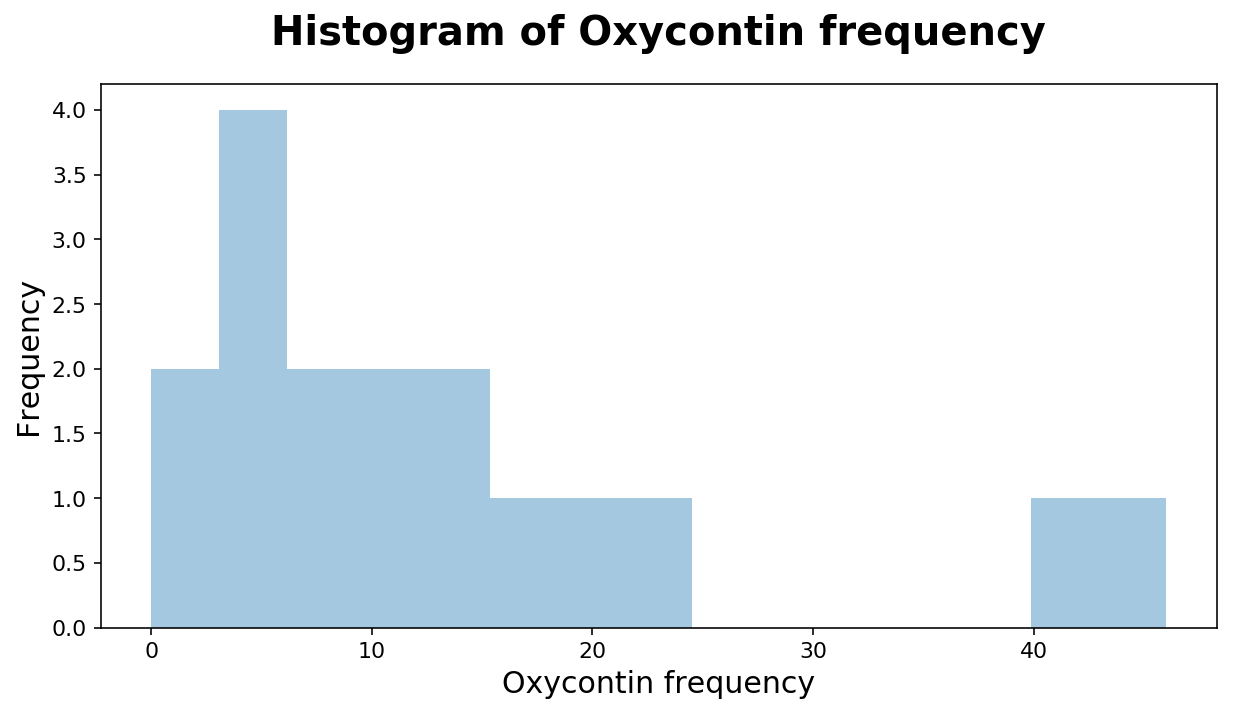

In [70]:
# Setting the plot figure size
plt.figure(figsize=(10,5))

# Using seaborn's distplot to plot distribution of 'oxycontin-frequency'
sns.distplot(drug['oxycontin-frequency'], bins=15, kde=False)

# Adding title, x & y labels and formatting
plt.title("Histogram of Oxycontin frequency", fontsize=20, fontweight='bold').set_position([.5, 1.05])
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Oxycontin frequency', fontsize=15)
plt.tick_params(labelsize = 11)
plt.show()

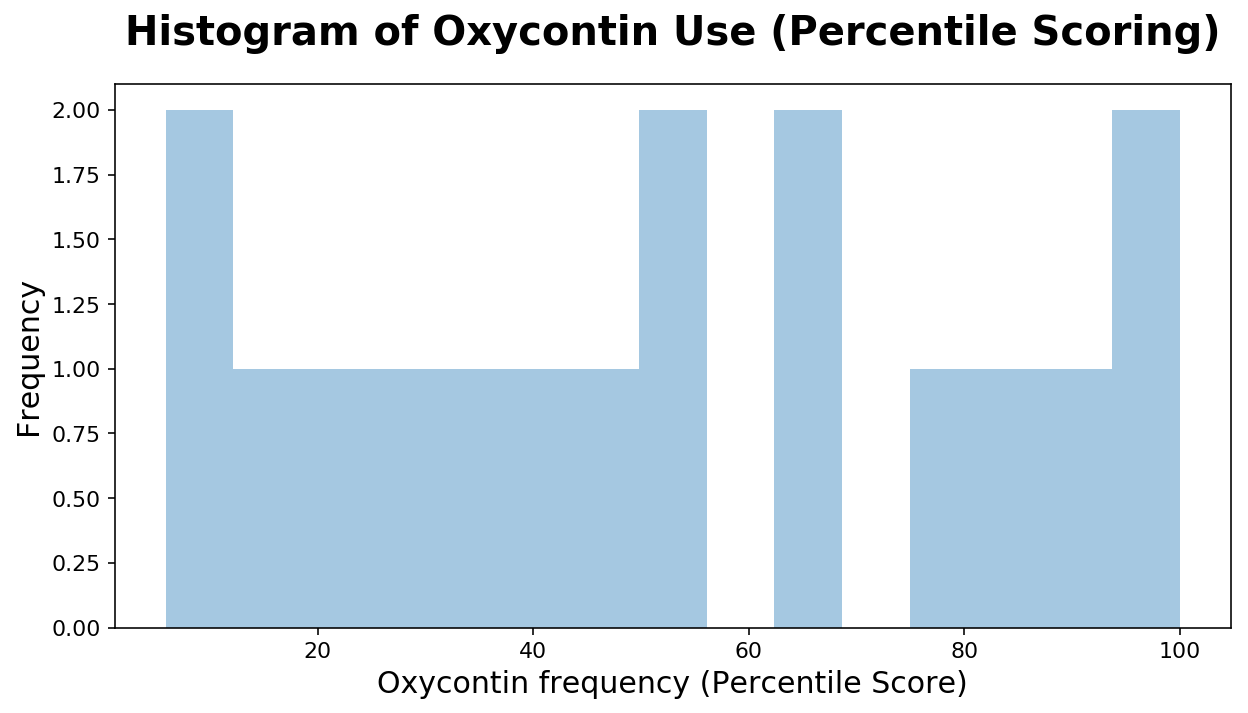

In [71]:
# Converting the oxycontin-use into percentile scoring
drug['oxycontin-frequency%'] = [stats.percentileofscore(drug['oxycontin-frequency'], i) for i in drug['oxycontin-frequency']]

# Setting the plot figure size
plt.figure(figsize=(10,5))

# Using seaborn's distplot to plot distribution of 'oxycontin-frequency' on percentile scoring
sns.distplot(drug['oxycontin-frequency%'], bins=15, kde=False)

# Adding title, x & y labels and formatting
plt.title("Histogram of Oxycontin Use (Percentile Scoring)", fontsize=20, fontweight='bold').set_position([.5, 1.05])
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Oxycontin frequency (Percentile Score)', fontsize=15)
plt.tick_params(labelsize = 11)
plt.show()

### The effect, visually, of coverting raw scores to percentile

One of the more obvious visual effects of converting raw scores to percentile that can be seen above is the spread of the distribution. The distribution of the percentiles is more evenly distributed as compared to the raw scores. Another thing that can be seen from the 2 graphs is the scale, the percentile scoring distribution runs from 0 to 100 whereas the raw scores vary.